<img src="https://github.com/DahyannAraya/copernicus_climada_seasonal_forecast_workshop/blob/main/images/Logos.png?raw=1" title="Institutional Logos" width="70%">

## Copernicus Seasonal Forecast Tools Package

This package is developed to manage seasonal forecast data from the [Copernicus Climate Data Store](https://cds.climate.copernicus.eu) (CDS) for the [U-CLIMADAPT project](https://www.copernicus-user-uptake.eu/user-uptake/details/responding-to-the-impact-of-climate-change-u-climadapt-488).
It offers comprehensive tools for downloading, processing, computing climate indices, and generating hazard objects based on seasonal forecast datasets, particularly [Seasonal forecast daily and subdaily data on single levels](https://cds.climate.copernicus.eu/datasets/seasonal-original-single-levels?tab=overview).
The package is tailored to integrate seamlessly with the [CLIMADA](https://climada.ethz.ch/) (CLIMate ADAptation) platform, supporting climate risk assessment and the development of effective adaptation strategies. 
This notebook provides an extended demonstration of the package's integration with CLIMADA's impact assessment framework, guiding users from raw forecasts to impact visualization.

Features:
- Download seasonal forecast data from CDS
- Process raw data into climate indices
- Calculate a heat-related index
- Create CLIMADA Hazard objects for further risk analysis
- Visualize hazard data
- Exposure Estimation
- Vulnerability Definition
- Analysis of Impacts
- Visualization of Impact Results

Prerequisites:

1. CDS account and API key: Register at https://cds.climate.copernicus.eu

2. CDS API client installation: pip install cdsapi

3. CDS API configuration: Create a .cdsapirc file in your home directory with your API key and URL. For instructions, visit: https://cds.climate.copernicus.eu/how-to-api#install-the-cds-api-client

4. Dataset Terms and Conditions: After selecting the dataset to download, make sure to accept the terms and conditions on the corresponding dataset webpage in the CDS portal before running this notebook. Here, https://cds.climate.copernicus.eu/datasets/seasonal-original-single-levels?tab=download.

For more information, visit the comprehensive [CDS API setup guide](https://copernicus-seasonal-forecast-tools.readthedocs.io/en/latest/cds_api.html), which walks you through each step of the process. Once configured, you'll be ready to explore and analyze seasonal forecast data.

**Note**:
Ensure you have the **necessary permissions** and comply with the CDS data usage policies when using this package. You can view the terms and conditions at https://cds.climate.copernicus.eu/datasets/seasonal-original-single-levels?tab=download. You can find them at the bottom of the download page.



### Setup and Installation (Google Colab Only)

This section installs and configures all necessary dependencies for running the seasonal forecast package in Google Colab. If you are running this notebook locally, follow the instructions in the [GitHub documentation](https://copernicus-seasonal-forecast-tools.readthedocs.io/en/latest/index.html).
Installed Dependencies:

    - cdsapi: For accessing the Copernicus Climate Data Store (CDS)
    - The seasonal forecast package: For processing and analyzing seasonal forecasts



In [1]:
# Configure Copernicus API credentials (FOR DEMONSTRATION ONLY)
# ⚠️ This API key is temporary and will not be available after this session.
# If you already have your own CDS key, replace it and use it here.
# To access data from the Copernicus Climate Data Store (CDS), you must use your personal API key.
# Register at https://cds.climate.copernicus.eu and follow the setup instructions to obtain your key.

url = 'url: https://cds.climate.copernicus.eu/api'
key = 'key: 5df55c41-98f3-4e60-b751-9c8cd43e90c7'

with open('/root/.cdsapirc', 'w') as f:
    f.write('\n'.join([url, key]))

with open('/root/.cdsapirc') as f:
    print(f.read())

url: https://cds.climate.copernicus.eu/api
key: 5df55c41-98f3-4e60-b751-9c8cd43e90c7


In [2]:
!pip install "cdsapi>=0.7.4"

In [3]:
import cdsapi
c = cdsapi.Client(debug=True)

2025-06-03 19:19:16,826 DEBUG GET https://cds.climate.copernicus.eu/api/catalogue/v1/messages
DEBUG:ecmwf.datastores.legacy_client:GET https://cds.climate.copernicus.eu/api/catalogue/v1/messages
2025-06-03 19:19:16,945 DEBUG REPLY {"messages":[{"id":"sites/cds/2024/2024-03-01-production-keycloak.md","date":"2024-09-26T00:00:00","summary":null,"url":null,"severity":"info","content":"Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.","live":true}]}
DEBUG:ecmwf.datastores.legacy_client:REPLY {"messages":[{"id":"sites/cds/2024/2024-03-01-production-keycloak.md","date":"2024-09-26T00:00:00","summary":null,"url":null,"severity":"info","content":"Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.","live":true}]}
2025-06-03 19:19:16,947 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:ecmwf.datastores.legacy_client:[2024-09-26

In [4]:
!git clone https://github.com/DahyannAraya/copernicus-seasonal-forecast-tools.git

Cloning into 'copernicus-seasonal-forecast-tools'...
remote: Enumerating objects: 439, done.
remote: Counting objects: 100% (439/439), done.
remote: Compressing objects: 100% (278/278), done.
remote: Total 439 (delta 243), reused 333 (delta 137), pack-reused 0 (from 0)
Receiving objects: 100% (439/439), 13.98 MiB | 21.02 MiB/s, done.
Resolving deltas: 100% (243/243), done.


In [5]:
!pip install copernicus-seasonal-forecast-tools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 112.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 111.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 69.4 MB/s eta 0:00:00


In [6]:
cd /content/copernicus-seasonal-forecast-tools/docs


/content/copernicus-seasonal-forecast-tools/docs


In [7]:
!pip install -r requirements.txt

  Cloning https://github.com/CLIMADA-project/climada_python.git to /tmp/pip-req-build-v7zy1gl7
  Running command git clone --filter=blob:none --quiet https://github.com/CLIMADA-project/climada_python.git /tmp/pip-req-build-v7zy1gl7
  Resolved https://github.com/CLIMADA-project/climada_python.git to commit 08ec51bb958436cd18e77cf8f4178bc05a295d78
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 86.1 MB/s eta 0:00:00


In [8]:
# Import packages

import warnings
import datetime as dt
warnings.filterwarnings('ignore')

from seasonal_forecast_tools import SeasonalForecast, ClimateIndex
from seasonal_forecast_tools.utils.coordinates_utils import (
    bounding_box_from_cardinal_bounds,
    bounding_box_global,
    bounding_box_from_countries,
)
from seasonal_forecast_tools.utils.time_utils import month_name_to_number

### Set up parameters

To configure the package for working with Copernicus forecast data and converting it into a hazard object for CLIMADA, you will need to define several essential parameters. These settings are crucial as they specify the type of data to be retrieved, the format, the forecast period, and the geographical area of interest. These parameters influence how the forecast data is processed and transformed into a hazard object.

Below, we outline these parameters and use an example for the "Maximum Temperature" index to demonstrate the seasonal forecast functionality.

To learn more about what these parameters entail and their significance, please refer to the [documentation on the CDS webpage](https://cds.climate.copernicus.eu/datasets/seasonal-original-single-levels?tab=overview).

#### Overview of parameters

**index_metric**: Defines the type of index to be calculated. There are currently **12 predefined options** available, including temperature-based indices (`Tmean` – Mean Temperature, `Tmin` – Minimum Temperature, `Tmax` – Maximum Temperature), heat stress indicators (`HIA` – Heat Index Adjusted, `HIS` – Heat Index Simplified, `HUM` – Humidex, `AT` – Apparent Temperature, `WBGT` – Wet Bulb Globe Temperature (Simple)), and extreme event indices (`HW` – Heat Wave, `TR` – Tropical Nights, `TX30` – Hot Days).

  - **Heat Waves ("HW")**:  
    If `index_metric` is set to 'HW' for heat wave calculations, additional parameters can be specified to fine-tune the heat wave detection:

    - **threshold**: Temperature threshold above which days are considered part of a heat wave. Default is 27°C.
    - **min_duration**: Minimum number of consecutive days above the threshold required to define a heat wave event. Default is 3 days.
    - **max_gap**: Maximum allowable gap (in days) between two heat wave events to consider them as one single event. Default is 0 days.

  - **Tropical Nights ("TR")**:  
    If `index_metric` is set to 'TR' for tropical nights, an additional parameter can be specified to set the threshold:

    - **threshold**: Nighttime temperature threshold, above which a night is considered "tropical." Default is 20°C.

- ⚠️ **Flexibility:** Users can define and integrate their own indices into the pipeline to extend the analysis according to their specific needs.


**format** : Specifies the format of the data to be downloaded, "grib" or "netcdf". Copernicus do **NOT** recommended netcdf format for operational workflows since conversion to netcdf is considered experimental. [More information here](https://confluence.ecmwf.int/display/CKB/GRIB+to+netCDF+conversion+on+new+CDS+and+ADS+systems).

**originating_centre**: Identifies the source of the data. A standard choice is "dwd" (German Weather Service), one of eight providers including ECMWF, UK Met Office, Météo France, CMCC, NCEP, JMA, and ECCC.

**system**: Refers to a specific model or configuration used for forecasts. In this script, the default value is "21," which corresponds to the GCSF (German Climate Forecast System) [version 2.1](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020MS002101). More details can be found in the [CDS documentation](https://cds.climate.copernicus.eu/datasets/seasonal-original-single-levels?tab=documentation).

**year_list**: A list of years for which data should be downloaded and processed.

**initiation_month**: A list of the months in which the forecasts are initiated. Example: ["March", "April"].

**forecast_period**: Specifies the months relative to the forecast's initiation month for which the data is forecasted. Example: ["June", "July", "August"] indicates forecasts for these months. The maximum available is 7 months.

  - **⚠️ Important**: When an initiation month is in one year and the forecast period in the next, the system recognizes the forecast extends beyond the initial year. Data is retrieved based on the initiation month, with lead times covering the following year. The forecast is stored under the initiation year’s directory, ensuring consistency while spanning both years.

**area_selection**: This determines the geographical area for which the data should be downloaded. It can be set to
- Global coverage:
    - Use the predefined function bounding_box_global() to select the entire globe.
- Custom geographical bounds (cardinal coordinates):
    - Input explicit latitude/longitude limits (in EPSG:4326).
    - *bounds = bounding_box_from_cardinal_bounds(northern=49, eastern=20, southern=40, western=10)*
- Country codes (ISO alpha-3):
    - Provide a list of ISO 3166-1 alpha-3 country codes (e.g., "DEU" for Germany, "CHE" for Switzerland). The bounding box is constructed as the union of all selected countries.See this [wikipedia page](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3) for the country codes.
    - *bounds = bounding_box_from_countries(["CHE", "DEU"])*

**overwrite**: Boolean flag that, when set to True, forces the system to redownload and reprocess existing files.

In [9]:
# We define above parameters for an example
index_metric = "TX30"
data_format = "grib"  # 'grib' or 'netcdf'
originating_centre =  "dwd"
system =  "21"
forecast_period = ["Jun", "August"] # from jun to august including july
year_list = [2023]
initiation_month = [ "March","April","May"]
overwrite = False

# global bounding box
# bounds = bounding_box_global()
# input cardinal bounds
# bounds = bounding_box_from_cardinal_bounds(northern=49, eastern=20, southern=40, western=10)
# input country ISO codes
bounds = bounding_box_from_countries(["CHE"])

# Parameters for Heat Waves
hw_threshold = 27
hw_min_duration = 3
hw_max_gap = 0

# Parameters for Tropical Nights
threshold_tr = 20

# Describe the selected climate index and the associated input data
forecast = SeasonalForecast(
    index_metric=index_metric,
    year_list=year_list,
    forecast_period=forecast_period,
    initiation_month=initiation_month,
    bounds=bounds,
    data_format=data_format,
    originating_centre=originating_centre,
    system=system,
    )

forecast.explain_index()

'Explanation for Hot Days (TX30): Hot Days (TX30): Counts days with maximum temperature exceeding 30°C. Required variables: 2m_temperature'

In [10]:
# Download and process data
forecast.download_and_process_data()

2025-06-03 19:20:08,255 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:ecmwf.datastores.legacy_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-06-03 19:20:09,913 INFO Request ID is 4806b839-a234-4896-b40a-1550d07b0cc5
INFO:ecmwf.datastores.legacy_client:Request ID is 4806b839-a234-4896-b40a-1550d07b0cc5
2025-06-03 19:20:09,986 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-06-03 19:20:31,282 INFO status has been updated to running
INFO:ecmwf.datastores.legacy_client:status has been updated to running
2025-06-03 19:20:42,731 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


f17dc6a593ef04dcefab740e31ad81aa.grib:   0%|          | 0.00/3.86M [00:00<?, ?B/s]

2025-06-03 19:20:43,459 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:ecmwf.datastores.legacy_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-06-03 19:20:45,079 INFO Request ID is 8e678df6-7d33-4f38-b22b-902a5943c46a
INFO:ecmwf.datastores.legacy_client:Request ID is 8e678df6-7d33-4f38-b22b-902a5943c46a
2025-06-03 19:20:45,126 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-06-03 19:21:17,691 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


1dac8ee18108e3f3955c6a66bb0afc5b.grib:   0%|          | 0.00/3.86M [00:00<?, ?B/s]

2025-06-03 19:21:18,370 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:ecmwf.datastores.legacy_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-06-03 19:21:19,977 INFO Request ID is d276c362-91d8-4642-bd31-79f31dc23dbc
INFO:ecmwf.datastores.legacy_client:Request ID is d276c362-91d8-4642-bd31-79f31dc23dbc
2025-06-03 19:21:20,038 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-06-03 19:21:33,535 INFO status has been updated to running
INFO:ecmwf.datastores.legacy_client:status has been updated to running
2025-06-03 19:21:41,211 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


7c12cf2819122accaaa5b8761cb92ded.grib:   0%|          | 0.00/3.86M [00:00<?, ?B/s]

{'downloaded_data': {'2023_init03_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/downloaded_data/grib/TX30_boundsN5_S44_E11_W48.grib'),
  '2023_init04_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/downloaded_data/grib/TX30_boundsN5_S44_E11_W48.grib'),
  '2023_init05_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init05/valid06_08/downloaded_data/grib/TX30_boundsN5_S44_E11_W48.grib')},
 'processed_data': {'2023_init03_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/processed_data/TX30_boundsN5_S44_E11_W48.nc'),
  '2023_init04_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/processed_data/TX30_boundsN5_S44_E11_W48.nc'),
  '2023_init05_valid06_08': PosixPath('/root/climada/data/copernicus_data

In [11]:
# Calculate index
forecast.calculate_index(hw_threshold=hw_threshold, hw_min_duration=hw_min_duration, hw_max_gap=hw_max_gap)

{'2023_init03_valid06_08': {'daily': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/indices/TX30/TX30_boundsN5_S44_E11_W48_daily.nc'),
  'monthly': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/indices/TX30/TX30_boundsN5_S44_E11_W48_monthly.nc'),
  'stats': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/indices/TX30/TX30_boundsN5_S44_E11_W48_stats.nc')},
 '2023_init04_valid06_08': {'daily': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/indices/TX30/TX30_boundsN5_S44_E11_W48_daily.nc'),
  'monthly': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/indices/TX30/TX30_boundsN5_S44_E11_W48_monthly.nc'),
  'stats': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/indices/TX30/TX30_boundsN5_S44

In [12]:
forecast.save_index_to_hazard()

{'2023_init03_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/hazard/TX30/TX30_boundsN5_S44_E11_W48.hdf5'),
 '2023_init04_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/hazard/TX30/TX30_boundsN5_S44_E11_W48.hdf5'),
 '2023_init05_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init05/valid06_08/hazard/TX30/TX30_boundsN5_S44_E11_W48.hdf5')}

## Finished with the Seasonal Forecast Tools Package, Now Moving on to Analyzing the Collected Data

- indice
    - 1. Start analyzing the data calculated by the index
    - 2. We can now estimate the exposure
    - 3. Set up vulnerability and calculate potential damages

#### 1. Start analyzing the data calculated by the index

In [13]:
# Access utility functions from the GitHub repository
#!wget https://raw.githubusercontent.com/DahyannAraya/climada_copernicus_seasonal_forecast_workshop/main/utility_functions.py

In [14]:
!rm utility_functions.py
!wget https://raw.githubusercontent.com/DahyannAraya/copernicus_climada_seasonal_forecast_workshop/main/utility_functions.py


rm: cannot remove 'utility_functions.py': No such file or directory
--2025-06-03 19:25:24--  https://raw.githubusercontent.com/DahyannAraya/copernicus_climada_seasonal_forecast_workshop/main/utility_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54010 (53K) [text/plain]
Saving to: ‘utility_functions.py’

utility_functions.p 100%[===================>]  52.74K  --.-KB/s    in 0.006s  

2025-06-03 19:25:25 (9.10 MB/s) - ‘utility_functions.py’ saved [54010/54010]



In [15]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from climada.entity import LitPop
from datetime import datetime
import numpy as np
from scipy.stats import skew, kurtosis

In [16]:


# Import utility functions
from utility_functions import (
    plot_forecast,
    plot_ensemble_index_summary,
    plot_individual_and_aggregated_impacts,
    plot_impact_distributions,
    plot_statistics_per_location,
    plot_statistics_and_member_agreement,
    print_summary_statistics,
    plot_intensity_distributions,
    forecast_skills_metrics
)

Using monthly index file: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/indices/TX30/TX30_boundsN5_S44_E11_W48_monthly.nc
Successfully loaded dataset: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/indices/TX30/TX30_boundsN5_S44_E11_W48_monthly.nc


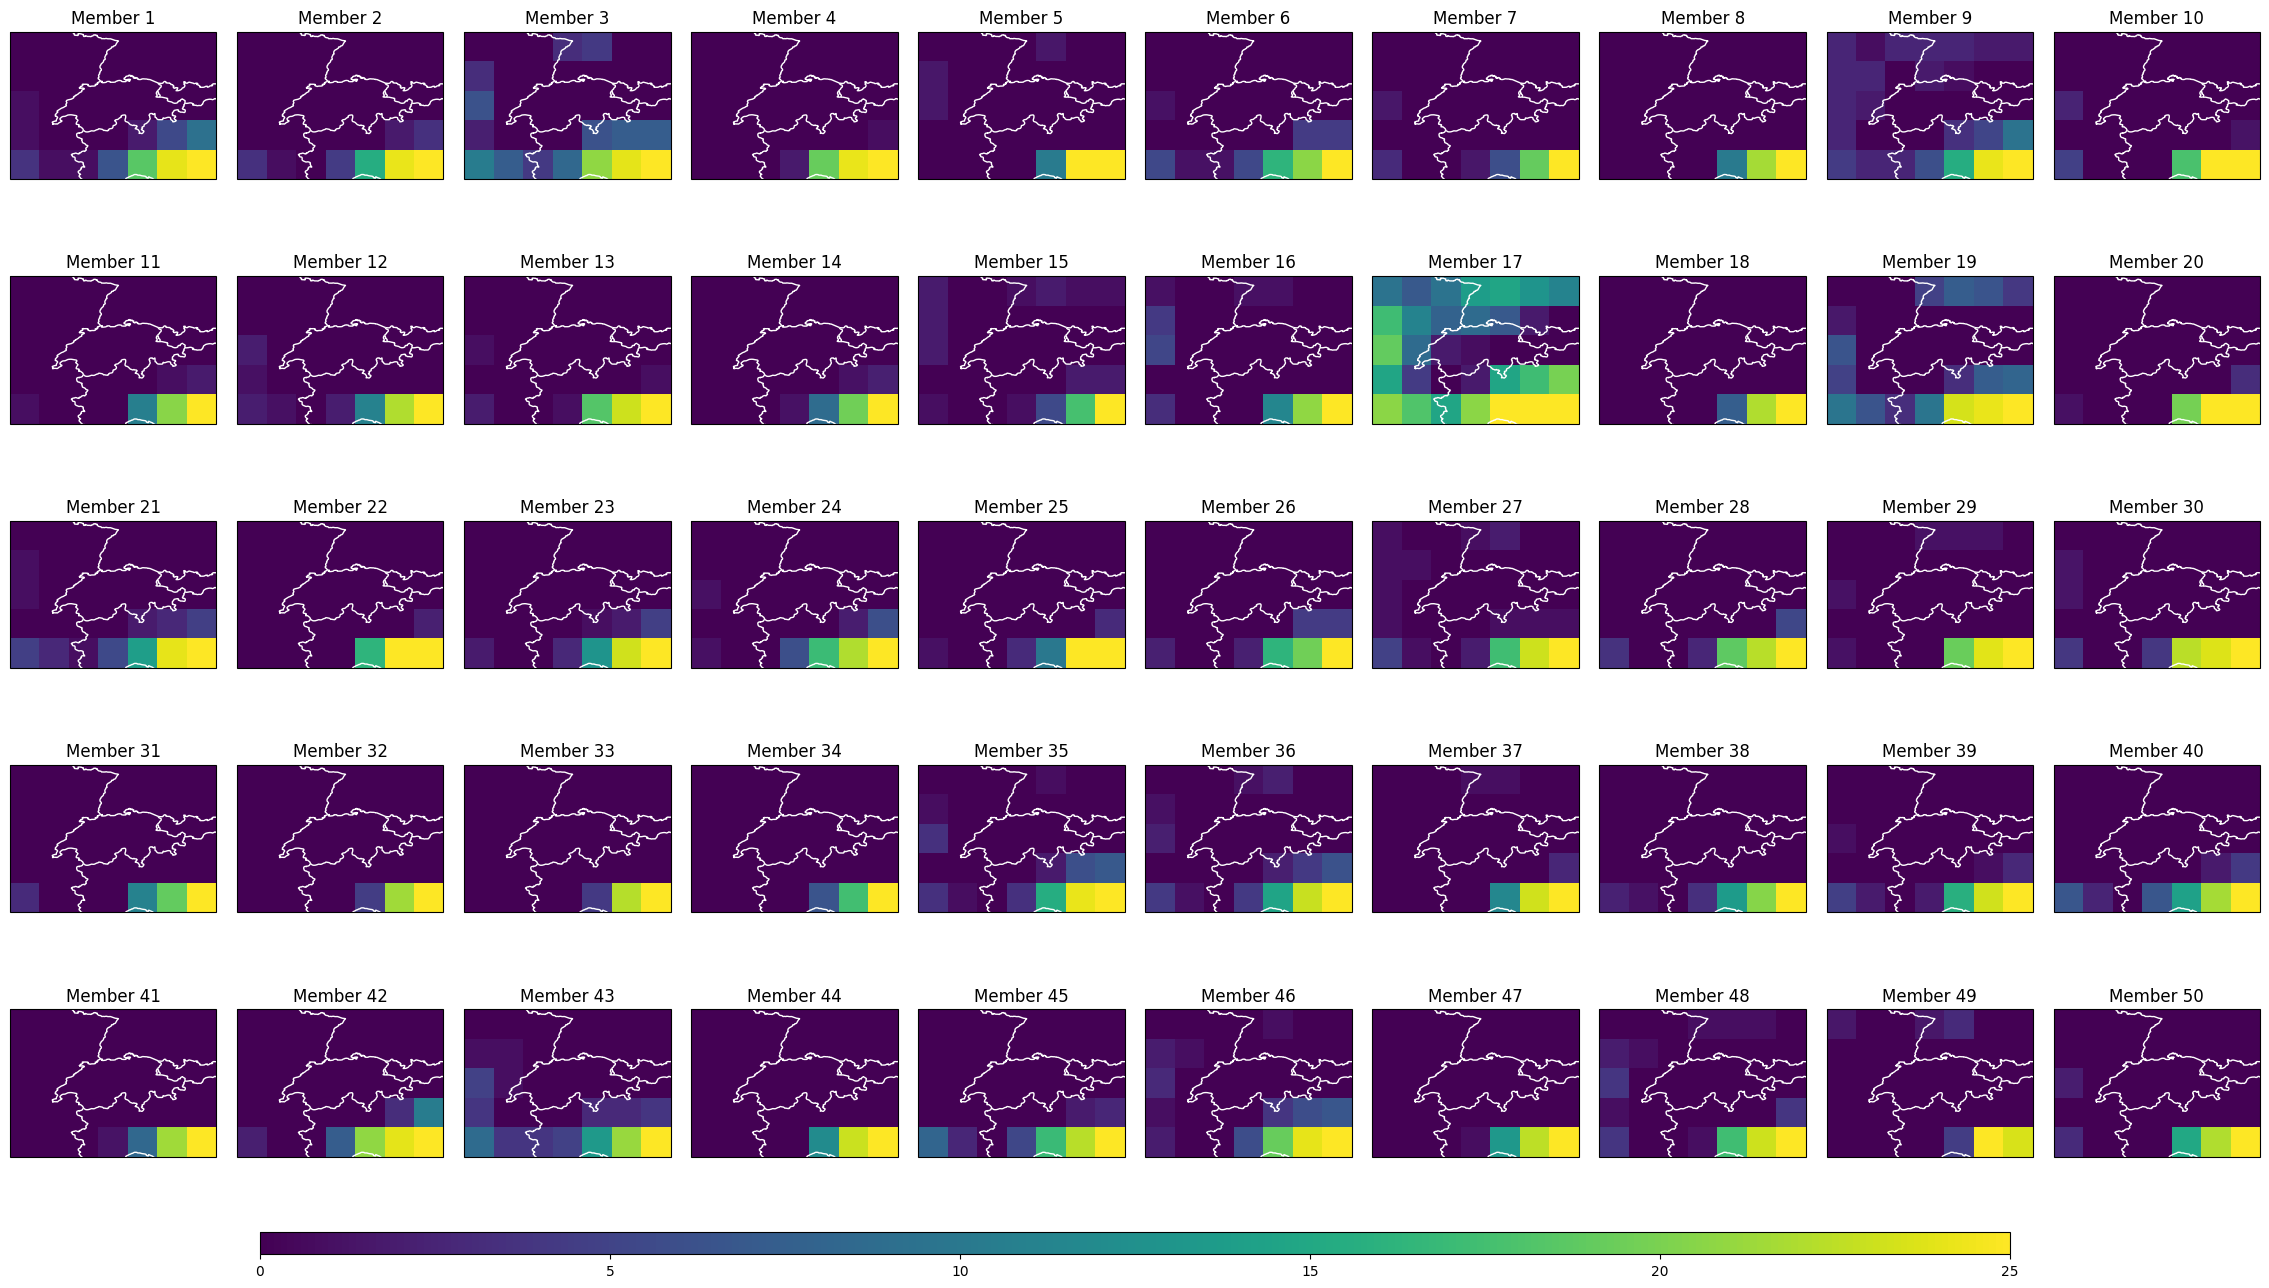

In [17]:
# Plot a sample of the index data
plot_forecast(2023, "03", "2023-07", forecast)

In [18]:
from climada.hazard import Hazard
forecast.save_index_to_hazard()
# Load the hazard and plot intensity for the selected grid
initiation_month_str = f"{month_name_to_number(initiation_month[0]):02d}"
forecast_month_str = f"{forecast.valid_period_str[-2:]}"  # Last month in valid period
forecast_year =  year_list[0]
if int(initiation_month_str) > int(forecast_month_str):
    forecast_year += 1  # Forecast extends to the next year

path_to_hazard = forecast.get_pipeline_path(forecast_year, initiation_month_str, "hazard")
hazard = Hazard.from_hdf5(path_to_hazard)

# Access hazard attributes
print("Hazard attributes:")
print(" - Shape of intensity (time, gridpoint):", hazard.intensity.shape)
print(" - Centroids:", hazard.centroids.shape)
print(" - Units:", hazard.units)
print(" - event_id:", hazard.event_id)
print(" - frequency:", hazard.frequency)
print(" - min, max fraction:", hazard.fraction.min(), hazard.fraction.max())
print(" - Date:", hazard.date)
print("min, max fraction: ", hazard.fraction.min(), hazard.fraction.max())
print(" - event_name:")
hazard.event_name

Hazard attributes:
 - Shape of intensity (time, gridpoint): (150, 35)
 - Centroids: (5, 7)
 - Units: days
 - event_id: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150]
 - frequency: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

['member0',
 'member0',
 'member0',
 'member1',
 'member1',
 'member1',
 'member2',
 'member2',
 'member2',
 'member3',
 'member3',
 'member3',
 'member4',
 'member4',
 'member4',
 'member5',
 'member5',
 'member5',
 'member6',
 'member6',
 'member6',
 'member7',
 'member7',
 'member7',
 'member8',
 'member8',
 'member8',
 'member9',
 'member9',
 'member9',
 'member10',
 'member10',
 'member10',
 'member11',
 'member11',
 'member11',
 'member12',
 'member12',
 'member12',
 'member13',
 'member13',
 'member13',
 'member14',
 'member14',
 'member14',
 'member15',
 'member15',
 'member15',
 'member16',
 'member16',
 'member16',
 'member17',
 'member17',
 'member17',
 'member18',
 'member18',
 'member18',
 'member19',
 'member19',
 'member19',
 'member20',
 'member20',
 'member20',
 'member21',
 'member21',
 'member21',
 'member22',
 'member22',
 'member22',
 'member23',
 'member23',
 'member23',
 'member24',
 'member24',
 'member24',
 'member25',
 'member25',
 'member25',
 'member26',
 'm

The plot below shows the distribution of TX30 intensity values for each initiation month (March, April, May). Each subplot aggregates the outputs from all ensemble members and spatial grid cells.

- The **X-axis** represents TX30 intensity values.
- The **Y-axis** indicates the frequency of those values across the ensemble.
- The **blue vertical line** marks the median intensity.
- The **red dashed line** indicates a reference value for comparison.

Most forecasts show **low intensities**, with a large number of events concentrated around **0**, indicating that many members predict **no extreme heat events**. However, some forecasts show **higher intensities**, leading to a skewed distribution. This highlights the **uncertainty and variability** in seasonal heat-related forecasts and the need to consider ensemble spread when interpreting results.



Initiation Month 03
  Max intensity: 31.00
  Min intensity: 0.00
  Mean: 3.76
  Median: 0.00
  Std Dev: 7.10

Initiation Month 04
  Max intensity: 31.00
  Min intensity: 0.00
  Mean: 3.90
  Median: 0.00
  Std Dev: 6.62

Initiation Month 05
  Max intensity: 31.00
  Min intensity: 0.00
  Mean: 2.80
  Median: 0.00
  Std Dev: 6.23


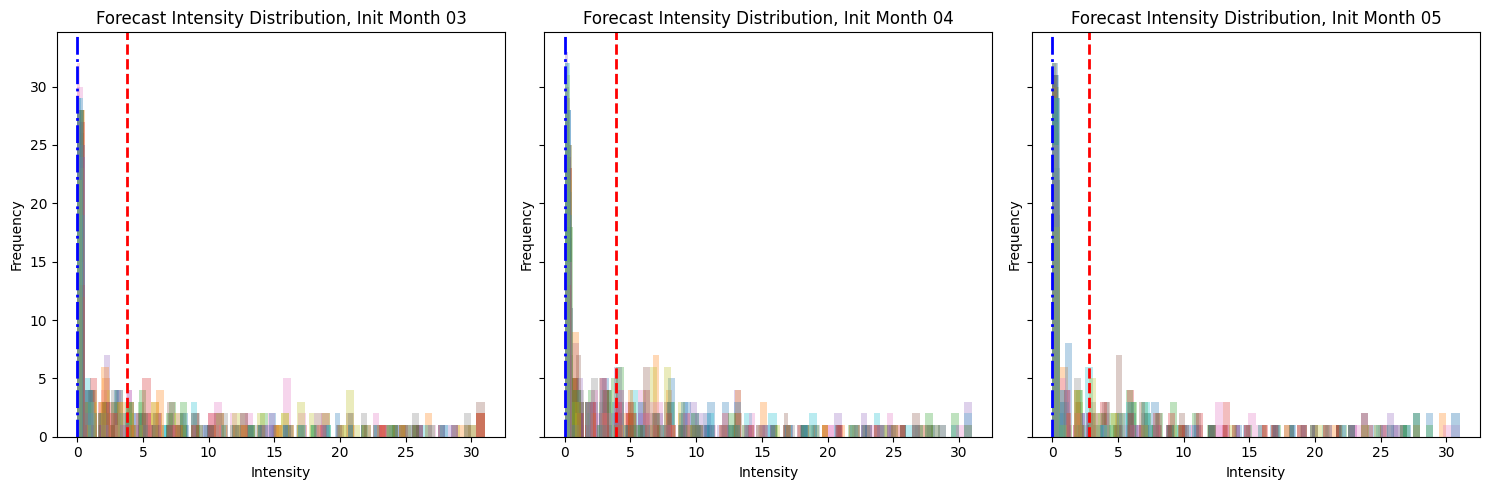

In [19]:
print_summary_statistics(2023, ["03", "04", "05"], forecast)
plot_intensity_distributions(2023, ["03", "04", "05"], forecast)


The figure below illustrates the evolution of the TX30 index (number of days above the 30°C threshold) for different forecast initiation months—March, April, and May 2023. Each subplot summarizes how the forecast evolves over the valid forecast months (June, July, August) across all ensemble members.

- **Blue Line:** Mean number of TX30 days across all ensemble members.
- **Orange Line:** Median value across members.
- **Red Shaded Area:** ±1 standard deviation around the mean.
- **Blue Shaded Area:** Full range between minimum and maximum forecast values (Min–Max Range).

These plots highlight:
- An **increasing trend** in expected TX30 days throughout the summer months.
- The **uncertainty and spread** across ensemble members, particularly in later forecast months.
- **Improved agreement** (narrower uncertainty bands) for later initiation dates (e.g., May), suggesting better confidence in near-term forecasts.


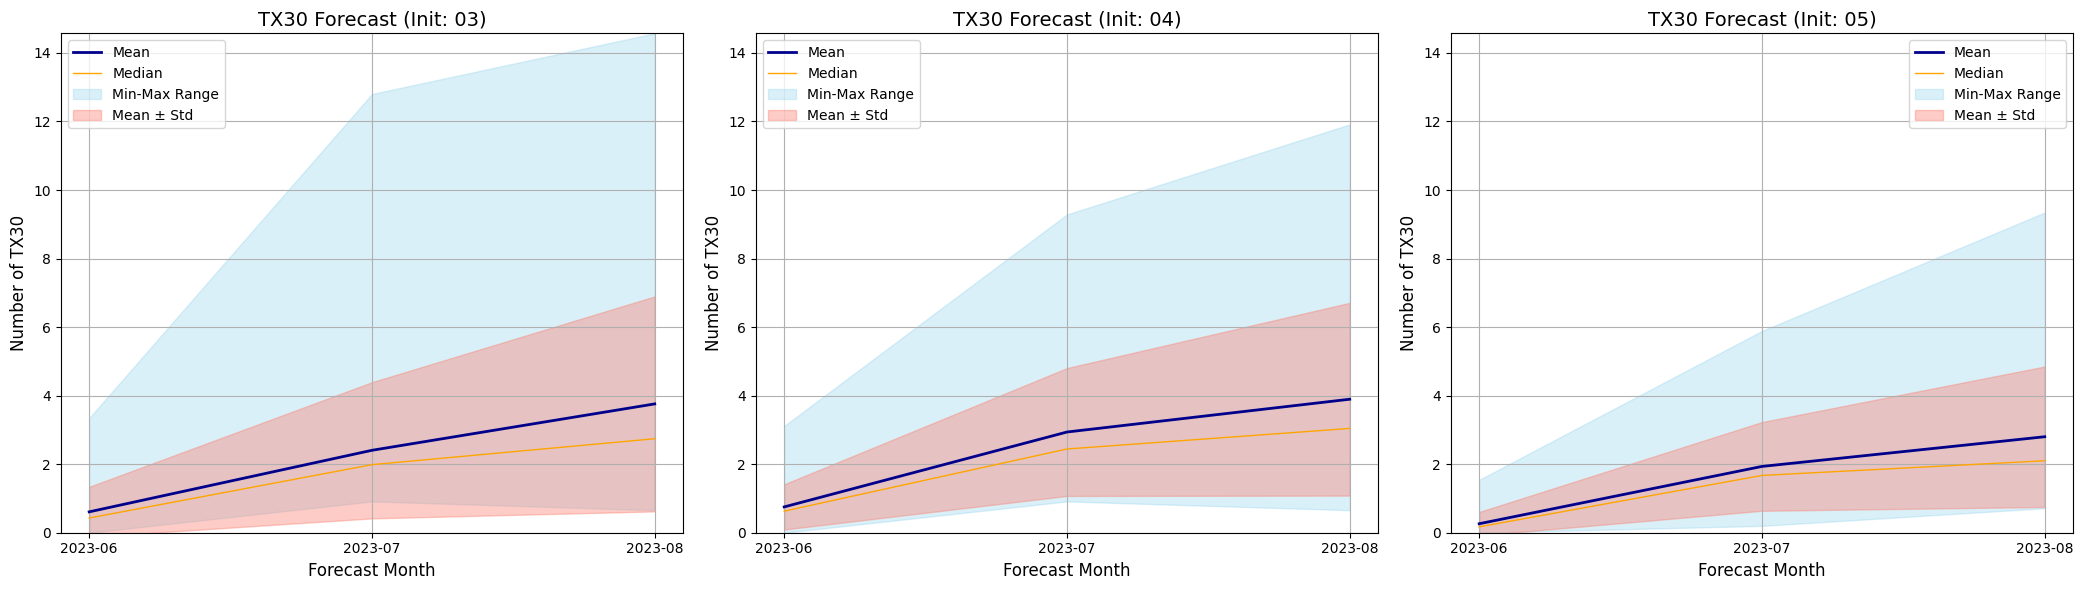

In [20]:
# forecast verification plots:
# analyzing ensemble prediction system (EPS) behavior over time across members
plot_ensemble_index_summary(
    forecast_year=2023,
    initiation_months=["03","04", "05"],
    valid_periods=["06", "07", "08"],
    forecast=forecast
)

We can also explore in CLIMADA the hazard's analytical tools, including an estimate of the return period (a return period is the estimated average time between events of a certain intensity or larger). However, due to the limited number of events in the seasonal forecast dataset, **this does not represent a true return period**, but rather a demonstration of the methodology. For meteorological data, at least 30 years of data is typically required for this type of estimation.

To generate the return period plot in CLIMADA, you can use the following method on a `Hazard` like `hazard.plot_rp_intensity()`

### 2. We can now estimate the exposure


After creating the hazard, we proceed to create the exposure. Exposure refers to the collection of assets, individuals, infrastructure, and other elements within a specific area of interest that may be vulnerable to hazards. It encompasses their geographical coordinates, values, and other relevant information. There are two main options for obtaining exposure data:

1. **CLIMADA's Ready-to-Use Data**:
CLIMADA offers pre-existing exposure data called LitPop. LitPop combines estimates of asset value, economic activity, or population based on nightlight intensity (Lit) and population count data (Pop). The formula for disaggregating asset exposure value to grid points is proportional to:

$$
Litpop = Lit^m \cdot Pop^n
$$



where \(m\) and \(n\) are user-defined exponents (default values are \(m=n=1\)).

LitPop can be set to focus on different socio-economic indicators such as:

- Produced Capital ('pc'): Uses infrastructure and assets as proxies for exposure.
- Population Count ('pop'): Uses population density as a proxy.
- Gross Domestic Product ('gdp'): Uses economic output as a measure of exposure.
- Other modes include income group ('income_group'), household wealth ('tw' or 'nfw'), normalized values ('norm'), or raw nightlight intensity ('none').

The default mode provides information on USD assets, while setting `fin_mode='pop'` provides population counts. Users can adjust the weight between GDP and population in LitPop using exponents such as, Population-Weighted `(1, 0)` or  GDP-Weighted`(0, 1)` depending on the desired focus. For example:

$$
Population^1 \cdot GDP^0
$$

More details can be found in the [LitPop documentation](https://climada-python.readthedocs.io/en/stable/tutorial/climada_entity_LitPop.html).



2. **Custom Data**:
If you have your own exposure data, you can provide it in formats such as `pandas.DataFrame`, `geopandas.GeoDataFrame`, or an Excel file. This allows users to define exposed elements with their own asset values, economic activity metrics, or population data. For further customization details, refer to the [Exposures documentation](https://climada-python.readthedocs.io/en/stable/tutorial/climada_entity_Exposures.html).

>**Tip:** The LitPop population data combines gridded night lights from NASA at a resolution of approximately 500 meters (15 arcseconds) and gridded population data from CIESIN at a resolution of about 1 km (30 seconds). Therefore, LitPop exposures can be retrieved at a maximum resolution of about 1 km, depending on the input data. The resolution can be set using the "res_arcsec" parameter. [More information](https://essd.copernicus.org/articles/12/817/2020/)   

We will now turn our attention to the LitPop data to be used in this demonstration. But first, there are a few points to mention:

- You can provide either single countries or a list of countries (e.g., ISO3 codes like `'CHE'` for Switzerland or `'DEU'` for Germany).
- Default LitPop exposure entities can be loaded for specific countries and years.
- To include all EU countries, add their ISO3 codes (e.g., `['AUT', 'BEL', 'BGR', ...]`).
- Resolution can be adjusted using the parameter `res_arcsec`, with the default being 30 arcseconds (~1 km). Higher resolutions (e.g., 15 arcseconds) may require more computational resources.
- Sub-national GDP data can be used as an intermediate downscaling layer for countries with large regional differences by activating `admin1_calc=True`.

In [21]:
from climada.util.api_client import Client

client = Client()

# Fetch the list of LitPop dataset infos for Switzerland
litpop_datasets = client.list_dataset_infos(
    data_type="litpop", properties={"country_name": ["Switzerland"]}
)
litpop_df = client.into_datasets_df(litpop_datasets)
litpop_df  # The 150 arcsec is app 4.631 kilometers

data_type data_type_group                                  uuid  \
0    litpop       exposures  d99916c1-343c-4826-96d6-d11987e4399f   
1    litpop       exposures  9203fb46-5d65-45a8-98d7-ad439463ae2b   
2    litpop       exposures  4aafe246-c3bf-4f1e-b3d4-79831abf9d91   

                             name version  status   doi  \
0  LitPop_assets_pc_150arcsec_CHE      v3  active  None   
1        LitPop_pop_150arcsec_CHE      v3  active  None   
2            LitPop_150arcsec_CHE      v3  active  None   

                                         description  \
0  LitPop asset value exposure per country: Gridd...   
1  LitPop population exposure per country: Gridde...   
2  LitPop asset value exposure per country: Gridd...   

                                     license  \
0  Attribution 4.0 International (CC-BY-4.0)   
1  Attribution 4.0 International (CC-BY-4.0)   
2  Attribution 4.0 International (CC-BY-4.0)   

                    activation_date expiration_date res_arcsec exponents  \
0  2024-06-07 08:21:45.678322+00:00            None        150     (3,0)   
1  2024-06-07 08:21:52.088193+00:00            None        150     (0,1)   
2  2024-06-07 08:21:55.124056+00:00            None        150     (1,1)   

  fin_mode spatial_coverage  climada_version date_creation country_iso3alpha  \
0       pc          country  v4.1.1 (v3.1.2)     2022-6-30               CHE   
1      pop          country  v4.1.1 (v3.1.2)     2022-6-30               CHE   
2       pc          country  v4.1.1 (v3.1.2)     2022-6-26               CHE   

  country_name country_iso3num  
0  Switzerland             756  
1  Switzerland             756  
2  Switzerland             756

⚠️ **Attention:** Please upload the file **`litpop_che_pop`** to Colab. This file contains the population data required to analyze exposure.  You can find this file in the [GitHub repository](https://github.com/DahyannAraya/copernicus_climada_seasonal_forecast_workshop/blob/main/litpop_che_pop)


**Upload population data**: For this step, you need to add the file from the GitHub repository called "litpop_che_pop". First, download the file to your computer. Then, open your project in GitLab. In the left-hand panel, click on the "Repository" tab and select "Files". At the top right of the file list, you will find an "Upload" button. Click it to upload the downloaded file.

_The file litpop_che_pop is a raster file created with CLIMADA’s LitPop module. It contains the spatial distribution of population and asset exposure in Switzerland at a resolution of 30 arcseconds. This file was generated using the desktop version of CLIMADA, where the exposure was first created with the set_litpop() function for the country ISO code "CHE" (Switzerland) and then saved as a raster file using write_raster()._

<GeoAxes: >

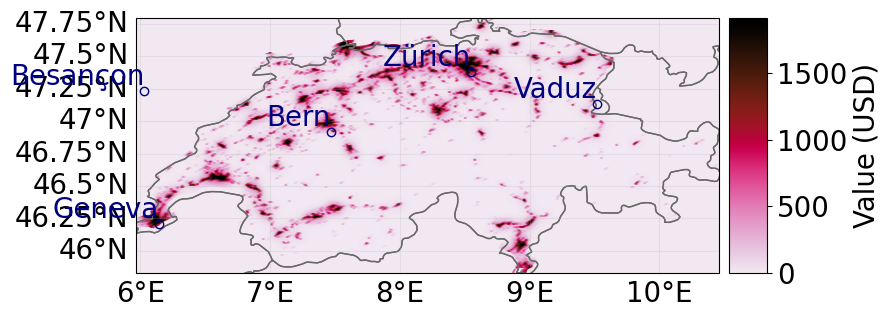

In [22]:

from climada.entity import Exposures

# Create exposure from raster file (e.g. GeoTIFF)
exposure = Exposures.from_raster("/content/litpop_che_pop")

exposure.plot_scatter(label="Population Exposure")


### 3. Set up vulnerability and calculate potential damages

### Creating an Impact Function

This tutorial will walk you through creating an impact function in CLIMADA, broken down into simple steps anyone can understand.

---

#### What is an Impact Function?

An impact function in CLIMADA describes how much damage a hazard (like a storm or flood) causes, depending on how strong it is.

It links together three [main concepts](https://climada-python.readthedocs.io/en/latest/tutorial/climada_entity_ImpactFuncSet.html):

- **Intensity**: How strong the hazard is (e.g. wind speed, flood depth).
- **MDD (Mean Degree of Damage)**: How badly things get damaged (from 0 = no damage to 1 = total destruction).
- **PAA (Proportion of Assets Affected)**: What fraction of exposed assets (e.g. buildings, infrastructure) are affected by the hazard.

Think of it as a mathematical way to answer the question:

*"If a hurricane with wind speed X hits, what percentage of buildings will be damaged, and how badly?"*

---

#### Creating a Simple Impact Function

Let’s create a basic "dummy" impact function to understand the concept. We’ll use synthetic values to keep it simple.

```python

# Define intensity values from 0 to 10 (e.g. wind speed)
intensity = np.linspace(0, 10, 100)

# Define damage from 0 (no damage) to 1 (total damage)
mdd = np.linspace(0, 1, 100)

# Assume all assets are affected (100%) at every intensity
paa = np.ones(100)



Here, we create a "dummy" impact function to examine the interaction of metrix selected in LitPop. The impact function is created by utilizing the previously generated hazard and exposure datasets.

The impact function is crafted, incorporating the following key elements, [click for more information](https://climada-python.readthedocs.io/en/latest/tutorial/climada_engine_Impact.html):

* impf: An ImpactFunc object is instantiated with the provided parameters, including the hazard type, ID, intensity, MDD, PAA, and units for intensity and MDD.

* impact_func_set: An ImpactFuncSet object is created, representing a collection or set of impact functions. The impf_dum impact function is added to this set using the ImpactFuncSet constructor with [impf_dum] as the argument.

* impf_ras.check(): This line of code calls the check() method on the impf_ras impact function set.

The impact object then has [these properties](https://climada-python.readthedocs.io/en/stable/tutorial/climada_engine_Impact.html#impact-class-data-structure).


BASE PATH: /root/climada/data/copernicus_data/seasonal_forecasts
Calculating impact for initiation month 03...
Hazard data loaded successfully for initiation month 03.
Impact saved: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/impact/TX30/TX30_boundsN5_S44_E11_W48.hdf5
Calculating impact for initiation month 04...
Hazard data loaded successfully for initiation month 04.
Impact saved: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/impact/TX30/TX30_boundsN5_S44_E11_W48.hdf5
Calculating impact for initiation month 05...
Hazard data loaded successfully for initiation month 05.
Impact saved: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init05/valid06_08/impact/TX30/TX30_boundsN5_S44_E11_W48.hdf5

Impact calculations completed successfully.

Impact Files Saved at:
 - /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/impact/TX30/TX30_boundsN5_S44_E11_W

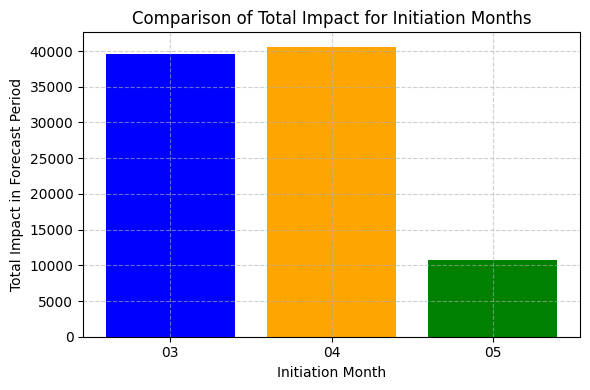

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from climada.hazard import Hazard
from climada.engine import ImpactCalc, Impact
from climada.entity.exposures.base import Exposures
from climada.entity.impact_funcs import ImpactFuncSet, ImpactFunc
from seasonal_forecast_tools.utils import config

# Set constants
initiation_month = ["03", "04", "05"]
index_metric = "TX30"
year_list = [2023]

# Get base data path from config
base_path = config.SEASONAL_FORECAST_DIR
print("BASE PATH:", config.SEASONAL_FORECAST_DIR)

# Load exposure from raster file (GeoTIFF path without extension)
exposure = Exposures.from_raster("/content/litpop_che_pop")

# Assign all exposure points to ImpactFunc ID 1 for TX30
exposure.gdf[f"impf_{index_metric}"] = 1

# Create a dummy impact function for TX30
intensity_array = np.linspace(0, 31, 20)
mdd_array = np.clip(np.log1p(intensity_array) / np.log1p(31), 0, 1) #At low TX30 days, damage increases slowly; at high intensities, damage grows faster.
paa_array = np.clip(intensity_array / 31, 0, 1) #Linear relationship: the higher the intensity, the more assets are affected

impact_func = ImpactFunc()
impact_func.haz_type = index_metric
impact_func.id = 1
impact_func.intensity = intensity_array
impact_func.mdd = mdd_array
impact_func.paa = paa_array
impact_func.intensity_unit = "°C"
impact_func.mdd_unit = "fraction"

if_set = ImpactFuncSet()
if_set.append(impact_func)

saved_files = []

for month_num in initiation_month:
    print(f"Calculating impact for initiation month {month_num}...")

    year_str = str(year_list[0])
    hazard_dir = os.path.join(
        base_path, "dwd", "sys21", year_str,
        f"init{month_num}", "valid06_08", "hazard", index_metric
    )

    if not os.path.isdir(hazard_dir):
        print(f"Warning: Hazard directory does not exist: {hazard_dir}")
        continue

    hazard_files = [
        f for f in os.listdir(hazard_dir)
        if f.startswith(f"{index_metric}_") and f.endswith(".hdf5")
    ]
    if not hazard_files:
        print(f"Warning: No hazard files found in {hazard_dir}")
        continue

    hazard_file = hazard_files[0]
    hazard_path = os.path.join(hazard_dir, hazard_file)

    try:
        hazard = Hazard.from_hdf5(hazard_path)
        print(f"Hazard data loaded successfully for initiation month {month_num}.")
    except Exception as e:
        print(f"Error loading hazard data for month {month_num}: {e}")
        continue

    # Assign centroids and calculate impact
    exposure.assign_centroids(hazard)
    impact = ImpactCalc(exposure, if_set, hazard).impact(save_mat=True)

    # Save impact
    impact_folder = os.path.join(
        base_path, "dwd", "sys21", year_str,
        f"init{month_num}", "valid06_08", "impact", index_metric
    )
    os.makedirs(impact_folder, exist_ok=True)

    impact_file = os.path.join(impact_folder, hazard_file)
    impact.write_hdf5(impact_file)
    saved_files.append(impact_file)

    print(f"Impact saved: {impact_file}")

print("\nImpact calculations completed successfully.")

if saved_files:
    print("\nImpact Files Saved at:")
    for file in saved_files:
        print(f" - {file}")

impact_objects = []
for file in saved_files:
    try:
        impact_objects.append(Impact.from_hdf5(file))
    except Exception as e:
        print(f"Error loading impact file {file}: {e}")

# Plot
if impact_objects:
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(
        initiation_month[:len(impact_objects)],
        [impact.at_event.mean() for impact in impact_objects],
        color=["blue", "orange", "green"]
    )
    ax.set_xlabel("Initiation Month")
    ax.set_ylabel("Total Impact in Forecast Period")
    ax.set_title("Comparison of Total Impact for Initiation Months")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


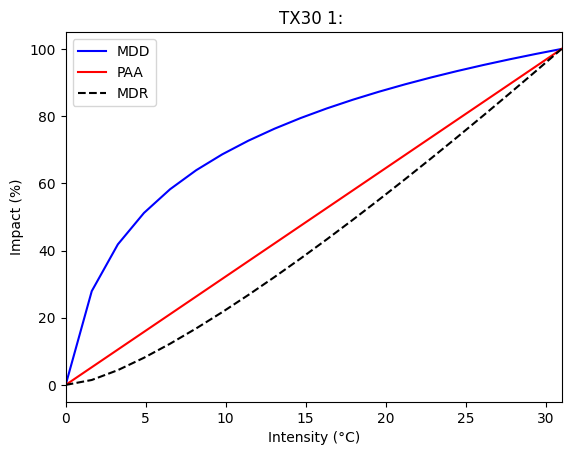

In [24]:
impact_func.plot();

In [25]:
# Load Impact objects into a dictionary
impacts = {
    "03": Impact.from_hdf5(saved_files[0]),
    "04": Impact.from_hdf5(saved_files[1]),
    "05": Impact.from_hdf5(saved_files[2])
}

for month in ["03", "04", "05"]:
    if month in impacts:
        total_impact = impacts[month].at_event.mean()
        print(f"Total Impact at Event Level for Initiation Month {month}: {total_impact:,.0f}")
    else:
        print(f"Warning: No impact data found for Initiation Month {month}")

Total Impact at Event Level for Initiation Month 03: 39,598
Total Impact at Event Level for Initiation Month 04: 40,588
Total Impact at Event Level for Initiation Month 05: 10,741


In [26]:
# Load Impact objects into a dictionary safely
months = ["03", "04", "05"]
impacts = {}

for i, month in enumerate(months):
    try:
        impacts[month] = Impact.from_hdf5(saved_files[i])
    except IndexError:
        print(f"Warning: No saved file for initiation month {month}")
    except Exception as e:
        print(f"Error loading impact for month {month}: {e}")

# Display total impacts
for month in months:
    if month in impacts:
        total_impact = impacts[month].at_event.mean()
        print(f"Total Impact at Event Level for Initiation Month {month}: {total_impact:,.0f}")
    else:
        print(f"Warning: No impact data found for Initiation Month {month}")


Total Impact at Event Level for Initiation Month 03: 39,598
Total Impact at Event Level for Initiation Month 04: 40,588
Total Impact at Event Level for Initiation Month 05: 10,741


Now we can explore metrics to assess the differences in impact between different initiation periods.

- **Mean Impact**: The average impact per event, aggregated across all ensemble members for each event on a specific date.
- **Max Impact**: The highest impact recorded across all events on a given date.
- **Min Impact**: The lowest impact recorded, often indicating whether zero-impact events are present.
- **Standard Deviation (Std Dev)**: A measure of how much the impact varies around the mean. Useful to understand general variability, but can be influenced by extreme values.
- **Interquartile Range (IQR)**: The range between the 75th percentile (Q3) and the 25th percentile (Q1), representing the middle 50% of impact values. More robust to outliers than standard deviation and especially useful for skewed data.
- **Coefficient of Variation (CV)**: The ratio of standard deviation to the mean, indicating relative variability in the impact distribution. Helps compare variability across datasets with different magnitudes.
- **Percentage of Zero-Impact Events**: The proportion of events with no recorded impact, highlighting ensemble members or periods where forecasts predict no effects.
- **Skewness**: A measure of asymmetry in the impact distribution. A positive value indicates a long right tail (i.e., high-impact outliers), while a negative value suggests more low-impact events.
- **Kurtosis**: Indicates whether the impact distribution has a sharp peak and heavy tails (high kurtosis) or is more evenly spread out and flat (low kurtosis).

**Note**: While standard deviation is commonly used to measure variability, it assumes a symmetric distribution and can be distorted by outliers. In contrast, IQR provides a clearer picture of how most values are spread, especially in skewed or heavy-tailed impact distributions.

These statistics help compare the impact forecasts across different initiation periods and forescat months. High variability (high std dev or CV) suggests uncertainty in the predictions, while differences in skewness and kurtosis can indicate whether extreme events dominate the impact distribution. The percentage of zero-impact events highlights differences in forecasted exposure to hazards.

By comparing these metrics across initiation periods, users can assess forecast reliability, uncertainty, and the likelihood of extreme impact events.

In [27]:
# Store results for later display in a table
results = []
df_init_months = {}

for month in ["03", "04", "05"]:
    if month in impacts:
        impact_obj = impacts[month]
        dates = [datetime.fromordinal(int(d)).strftime("%Y-%m-%d") for d in np.unique(impact_obj.date)]

        # Extract impact per event
        impact_per_event = impact_obj.at_event
        df = pd.DataFrame({"date": impact_obj.date, "impact": impact_per_event})
        df_init_months[month] = df.copy()

        # Compute statistics per date
        impact_stats = df.groupby("date")["impact"].agg(
            mean="mean",
            max="max",
            min="min",
            std="std",
            q25=lambda x: x.quantile(0.25),
            q75=lambda x: x.quantile(0.75),
            skewness=lambda x: skew(x, nan_policy="omit"),
            kurt=lambda x: kurtosis(x, nan_policy="omit"),
            zero_impact=lambda x: (x == 0).sum() / len(x) * 100
        ).reset_index()

        impact_stats["iqr"] = impact_stats["q75"] - impact_stats["q25"]
        impact_stats["cv"] = impact_stats["std"] / impact_stats["mean"] * 100

        for date, row in zip(dates, impact_stats.itertuples(index=False)):
            results.append([
                month,
                date,
                "{:,.1f}".format(row.mean),
                "{:,.1f}".format(row.max),
                "{:,.1f}".format(row.min),
                "{:,.1f}".format(row.std),
                "{:,.1f}".format(row.iqr),
                "{:,.1f}".format(row.cv),
                round(row.skewness, 2),
                round(row.kurt, 2),
                round(row.zero_impact, 1)
            ])
    else:
        print(f"Warning: No impact data found for Initiation Month {month}")

# Create DataFrame for display
df_results = pd.DataFrame(results, columns=[
    "Initiation Month", "Date", "Mean Impact", "Max Impact", "Min Impact",
    "Std Dev", "IQR", "CV (%)", "Skewness", "Kurtosis", "Zero-Impact (%)"
])
df_results["Date"] = pd.to_datetime(df_results["Date"])
df_results

Initiation Month       Date Mean Impact   Max Impact Min Impact    Std Dev  \
0               03 2023-06-01       129.3      3,190.0        0.0      628.8   
1               03 2023-07-01    26,530.6  1,038,211.3        0.0  146,849.2   
2               03 2023-08-01    92,135.3  1,406,386.0        0.0  257,418.6   
3               04 2023-06-01       438.8     21,907.4        0.0    3,098.1   
4               04 2023-07-01    22,216.3    437,419.7        0.0   67,408.7   
5               04 2023-08-01    99,108.3    803,972.9        0.0  185,103.2   
6               05 2023-06-01         0.0          0.0        0.0        0.0   
7               05 2023-07-01     4,396.1     82,656.1        0.0   13,317.4   
8               05 2023-08-01    27,826.2    420,008.9        0.0   74,725.2   

        IQR CV (%)  Skewness  Kurtosis  Zero-Impact (%)  
0       0.0  486.2      4.69     20.03             90.0  
1      76.9  553.5      6.74     43.91             54.0  
2  46,312.9  279.4      3.80     14.53             22.0  
3       0.0  706.0      6.86     45.02             94.0  
4  11,533.6  303.4      5.07     27.49             38.0  
5  65,651.5  186.8      2.20      4.20             14.0  
6       0.0    nan       NaN       NaN            100.0  
7       7.1  302.9      4.49     22.49             68.0  
8  11,494.7  268.5      3.75     14.91             54.0

Below the plot shows the total population impacted by heat-related events for each ensemble member, sorted by impact.

- The X-axis is the ranked index of ensemble members (not the true ensemble ID), sorted by increasing impact.
- The Y-axis shows the total number of people affected in each simulation.
- Different colors represent different forecast initiation months (March, April, May).

The plot helps to undertand the **distribution and extremes** of potential impacts:

- It reveals the shape of the impact distribution across ensemble members.
- It shows how many members lead to low vs. high impact.
- It highlights that a **small number of members** (e.g. top 10 out of 150) may drive **most of the expected risk**, revealing the **tail behavior** of the forecast.


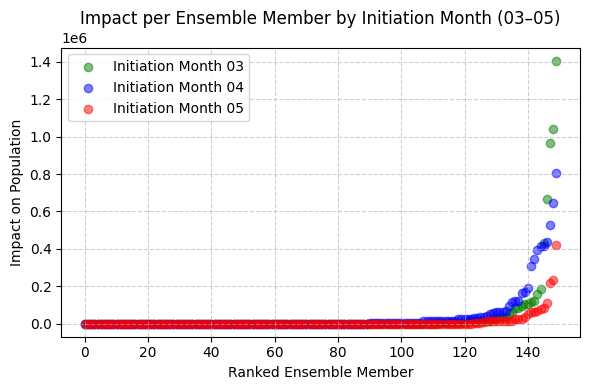

In [28]:
monthly_impact_stats = {}

# Compute impact summaries for each initiation month (not used in this plot, kept for potential use)
for month in ["03", "04", "05"]:
    if month in impacts:
        monthly_impact_stats[month] = impacts[month].calc_freq_curve(1 / np.linspace(1, 151, 150))
    else:
        print(f"Warning: No impact data found for Initiation Month {month}")

# Plotting impact values per ensemble member
fig, ax = plt.subplots(figsize=(6, 4))
colors = {"03": "green", "04": "blue", "05": "red"}

# Plot "sorted" impacts for each initiation month
for month in ["03", "04", "05"]:
    if month in df_init_months:
        df_plot = df_init_months[month].sort_values(by="impact", ascending=True).reset_index(drop=True)
        df_plot["ensemble_member"] = df_plot.index

        ax.scatter(
            df_plot["ensemble_member"],
            df_plot["impact"],
            label=f"Initiation Month {month}",
            color=colors[month],
            alpha=0.5
        )

ax.set_title("Impact per Ensemble Member by Initiation Month (03–05)")
ax.set_xlabel("Ranked Ensemble Member")
ax.set_ylabel("Impact on Population")
ax.legend()
ax.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [29]:
# Print event_id, event_name, date, and at_event for Initiation Month 03
print("Event IDs in Impact (03):", impacts["03"].event_id)
print("Event Names in Impact (03):", impacts["03"].event_name)
print("Event Dates in Impact (03):", impacts["03"].date)
print("Impact at Event Level (03):", impacts["03"].at_event)

Event IDs in Impact (03): [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150]
Event Names in Impact (03): ['member0', 'member0', 'member0', 'member1', 'member1', 'member1', 'member2', 'member2', 'member2', 'member3', 'member3', 'member3', 'member4', 'member4', 'member4', 'member5', 'member5', 'member5', 'member6', 'member6', 'member6', 'member7', 'member7', 'member7', 'member8', 'member8', 'member8', 'member9', 'member9', 'member9', 'memb

These plots show the forecasted number of people affected by climate hazards from June to August, for each ensemble member and forecast initiation month (March, April, May). Each line represents one ensemble member. The dashed line shows the mean forecast. The solid line indicates the median forecast. The shaded area visualizes ±1 standard deviation (forecast spread).


We can see that:
- Impact forecasts vary across ensemble members, reflecting uncertainty.
- Forecast variability increases with lead time (more spread in August).
- Forecasts become more refined from March to May as more recent data is used.
- Some ensemble members show extreme impacts.


Looking for impact files in: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/impact/TX30
Loading impact file: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/impact/TX30/TX30_boundsN5_S44_E11_W48.hdf5
Looking for impact files in: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/impact/TX30
Loading impact file: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/impact/TX30/TX30_boundsN5_S44_E11_W48.hdf5
Looking for impact files in: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init05/valid06_08/impact/TX30
Loading impact file: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init05/valid06_08/impact/TX30/TX30_boundsN5_S44_E11_W48.hdf5


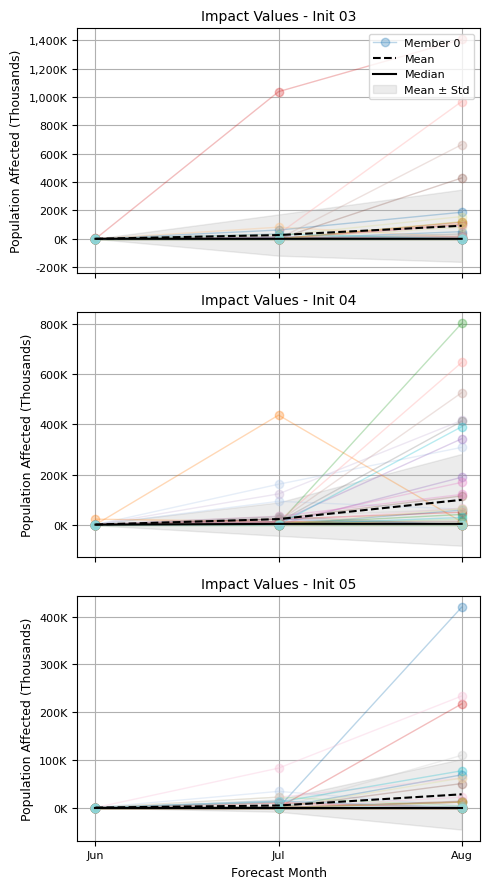

In [30]:
# Call the function for multiple initiation months
plot_individual_and_aggregated_impacts(year_list, index_metric,"03", "04", "05")

These plots display the percentage of ensemble members agreeing on different levels of forecasted population impacts for June, July, and August 2023, under different forecast initiation months (03, 04, 05). The y-axis shows the percentage of ensemble members that agree on a given impact level (x-axis, log-scaled population affected).

- **June Shows Low Agreement and Low Impact:** For all initiation months, most members forecast no impact in June, with mean and median impacts close to zero.
- **July and August Show Higher Impact and Spread:** Agreement shifts toward higher impact values, especially in August, though variability among members increases.
- **Long-Tailed Distributions:** High skewness in many plots indicates a few members predict significantly higher impacts than the rest.
- **Ensemble Divergence in August:** Wider impact spread and lower consensus reflect greater uncertainty in late summer heat-related events.

These plots help assess the distribution and consensus of forecasted impacts across ensemble members, highlighting months with higher risk and lower predictability.

Looking for impact files in: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/impact/TX30
Loading impact file: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/impact/TX30/TX30_boundsN5_S44_E11_W48.hdf5


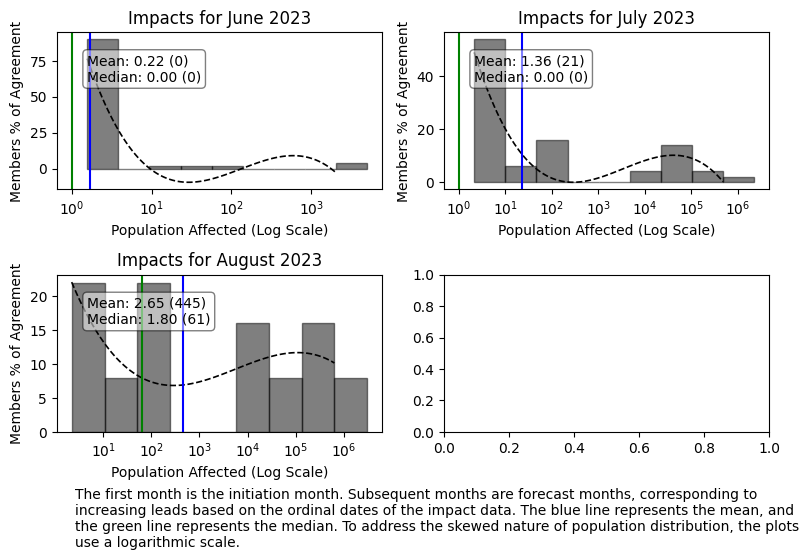

Looking for impact files in: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/impact/TX30
Loading impact file: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/impact/TX30/TX30_boundsN5_S44_E11_W48.hdf5


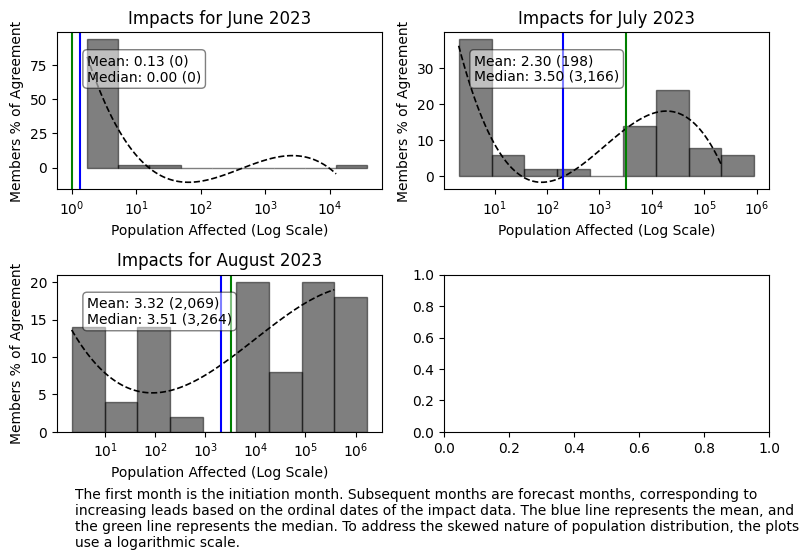

Looking for impact files in: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init05/valid06_08/impact/TX30
Loading impact file: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init05/valid06_08/impact/TX30/TX30_boundsN5_S44_E11_W48.hdf5
Skipping polynomial fit for June 2023 due to instability.


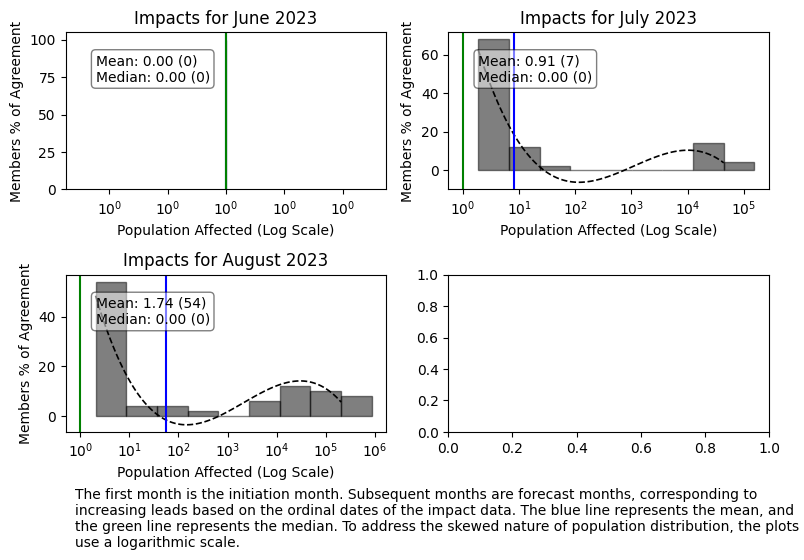

In [31]:
plot_impact_distributions(year_list, index_metric, ["03", "04", "05"])

### Spatial Consistency Analysis of Forecasted Impacts

This section explores the spatial distribution of forecasted impacts across Switzerland, assessing how consistently ensemble members agree in different regions. Several key statistical metrics are plotted for each grid cell:

- **Mean:** Average impacted population across all ensemble members.
- **Median:** Middle value, useful for identifying typical outcomes unaffected by extremes.
- **Standard Deviation:** Measures variability among ensemble members, highlighting areas of uncertainty.
- **Max:** Highest impact forecasted by any member, showing worst-case scenarios.
- **Min:** Lowest impact (often zero), indicating areas where no impact is projected.

This spatial breakdown complements the temporal and statistical summaries by showing *where* impacts are expected and *how robust* these signals are across the forecast ensemble.

Looking for impact files in: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/impact/TX30
Loading impact file: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/impact/TX30/TX30_boundsN5_S44_E11_W48.hdf5


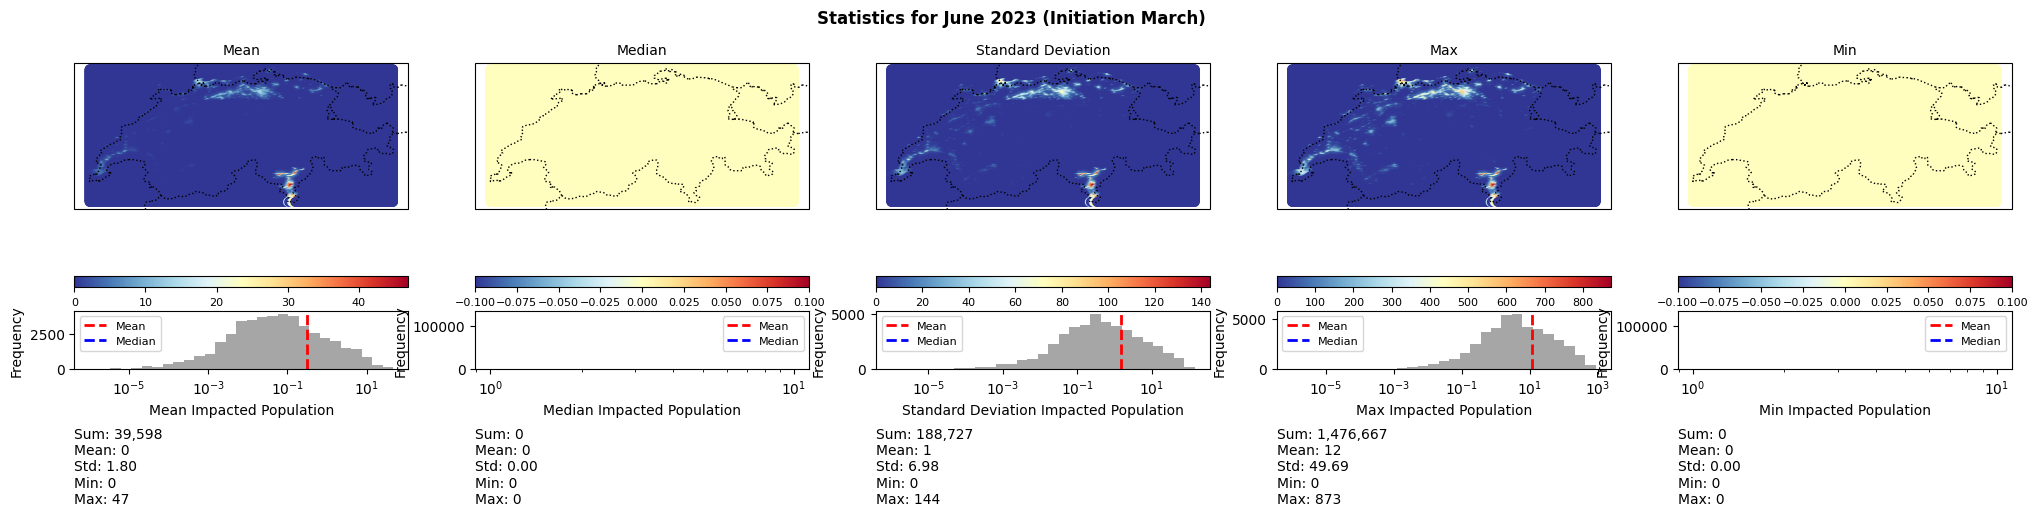

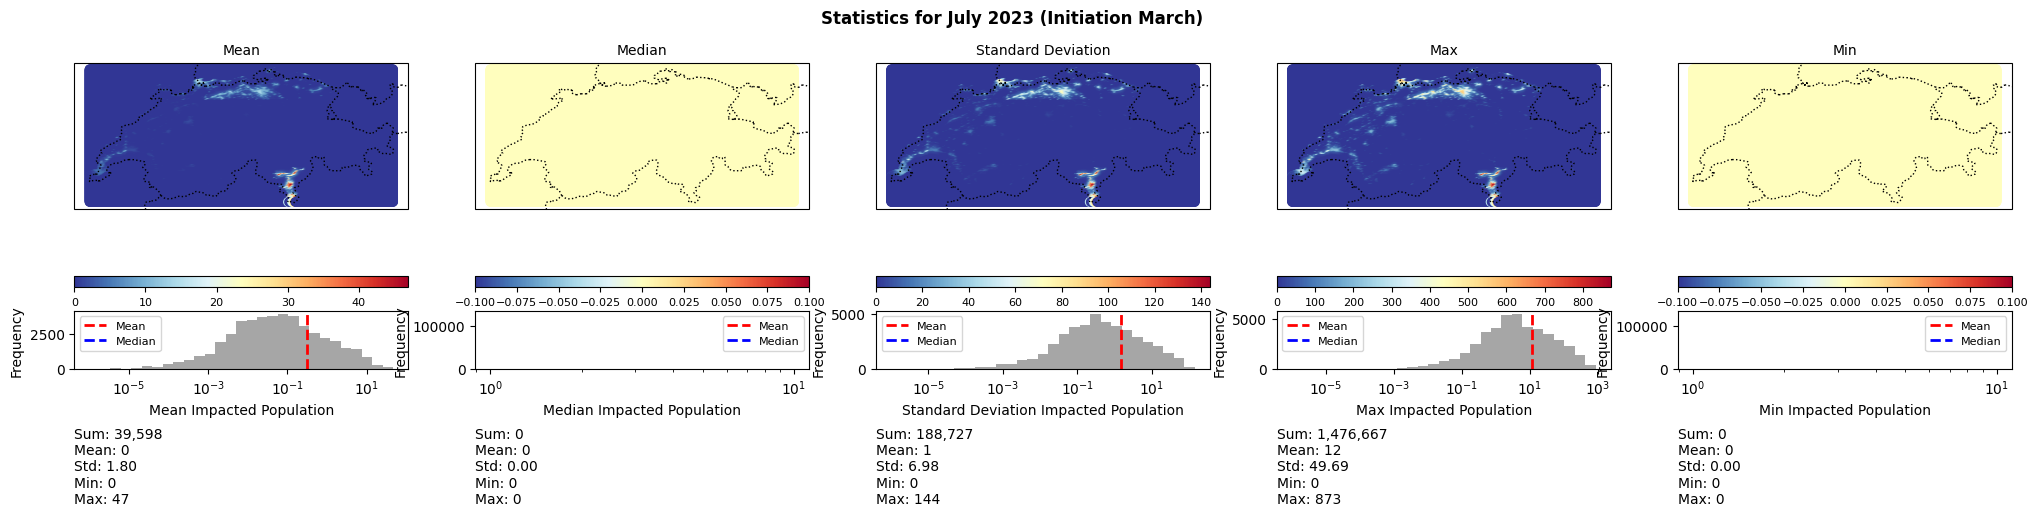

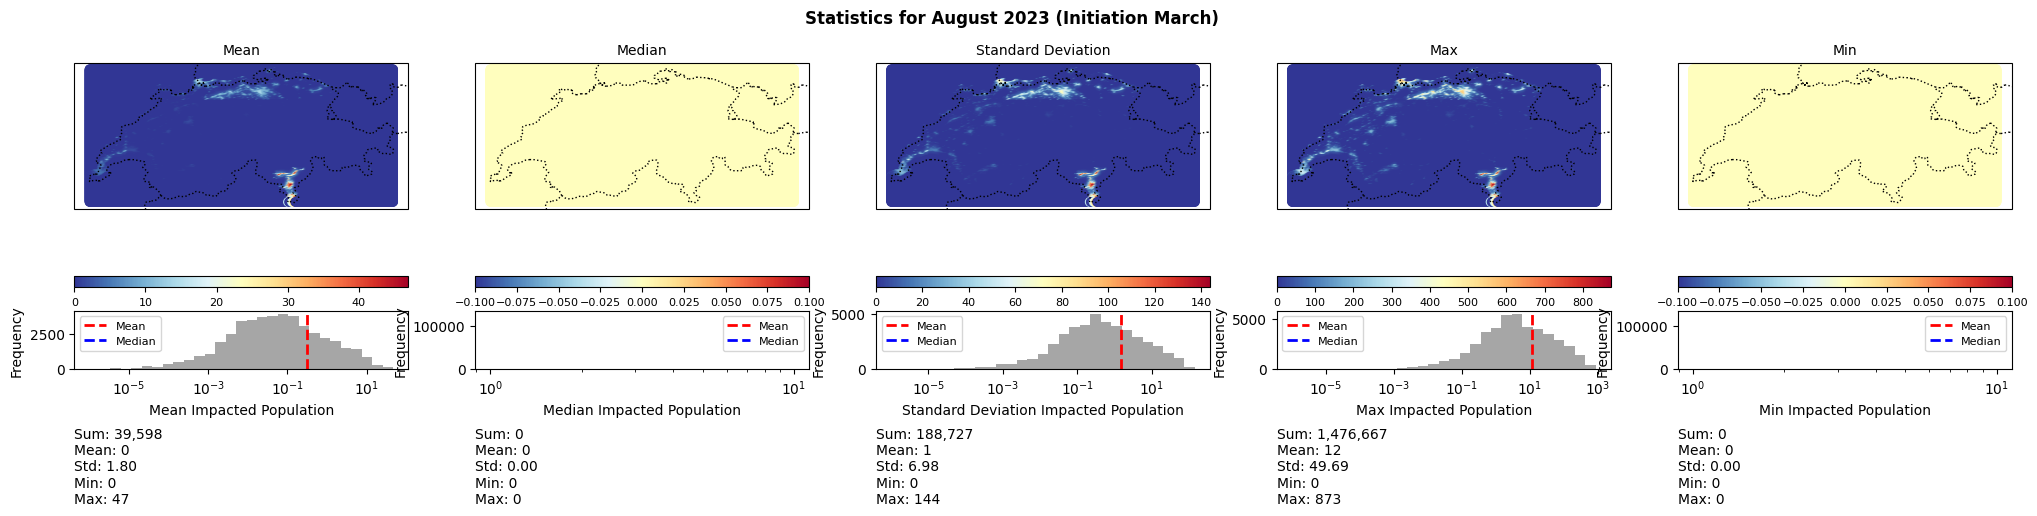

Looking for impact files in: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/impact/TX30
Loading impact file: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/impact/TX30/TX30_boundsN5_S44_E11_W48.hdf5


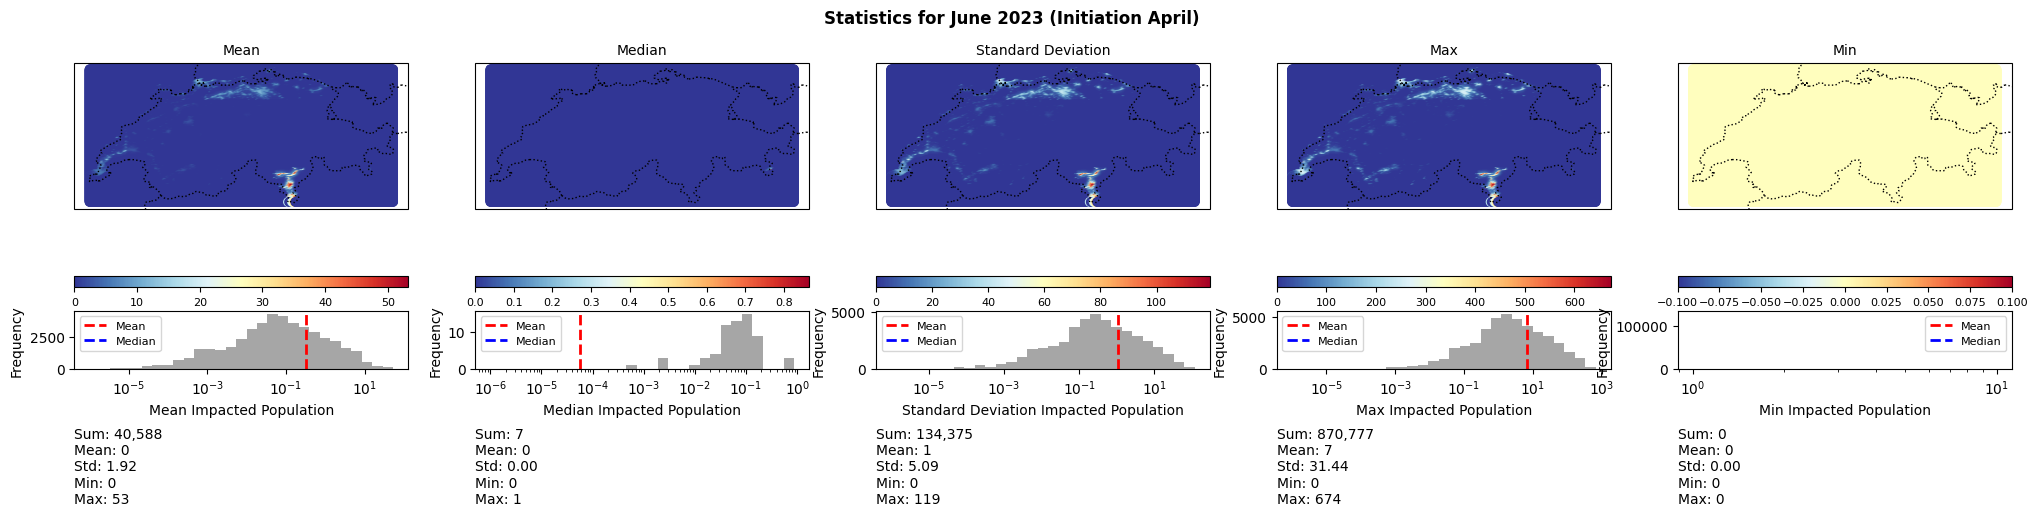

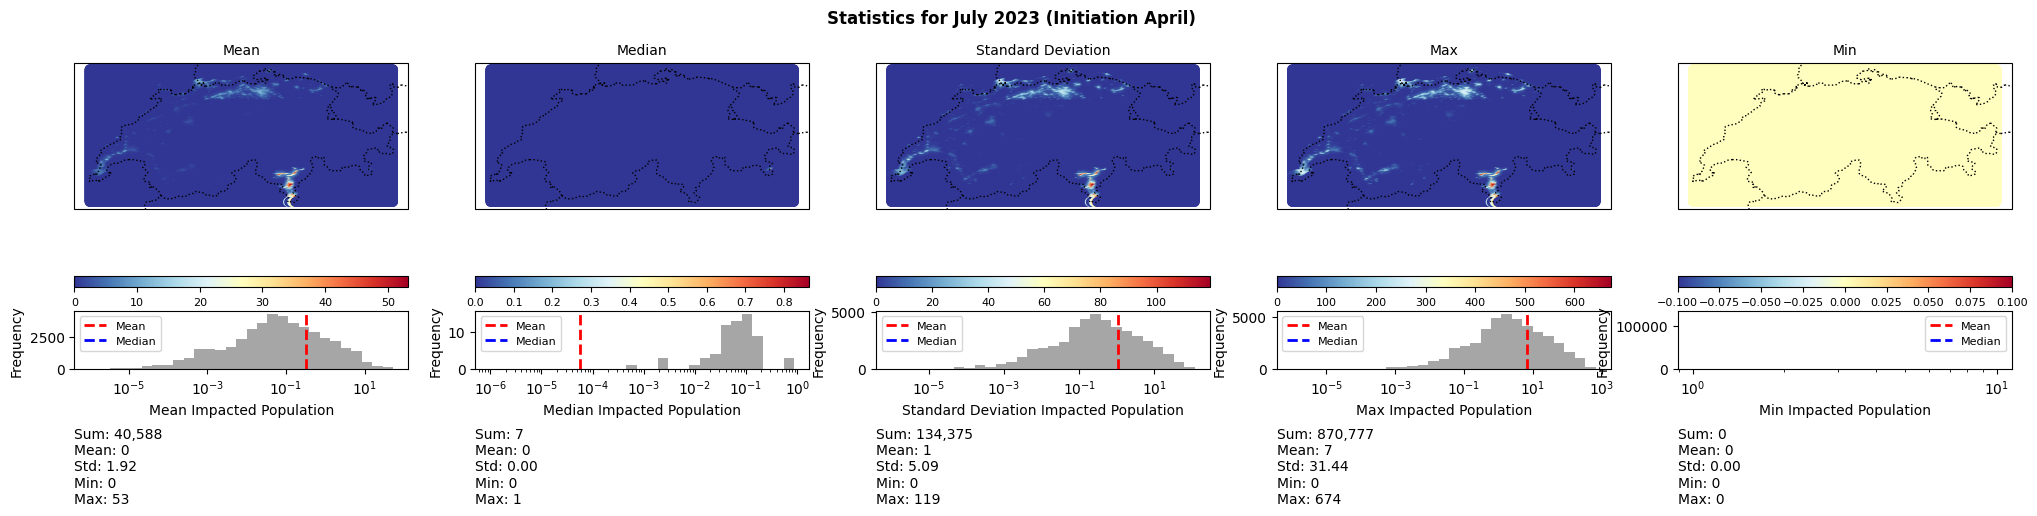

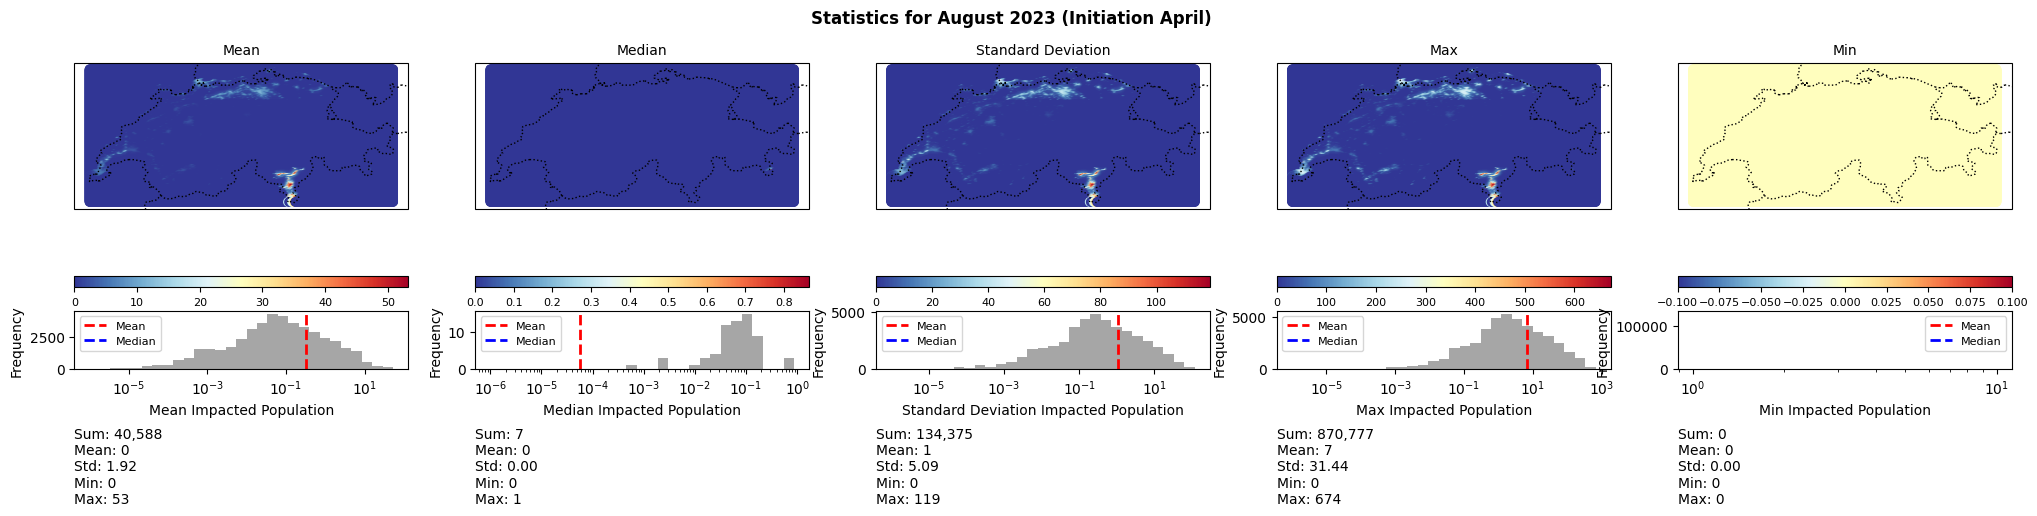

Looking for impact files in: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init05/valid06_08/impact/TX30
Loading impact file: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init05/valid06_08/impact/TX30/TX30_boundsN5_S44_E11_W48.hdf5


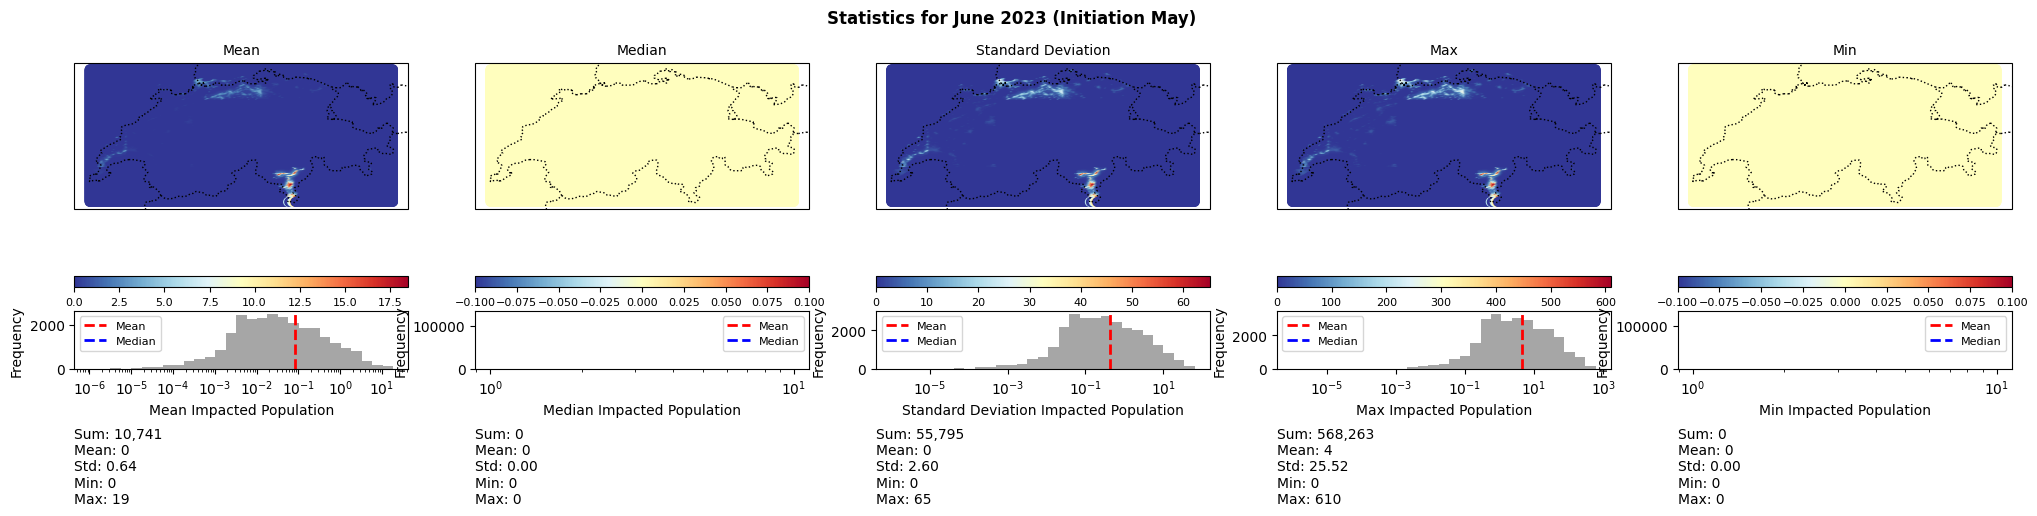

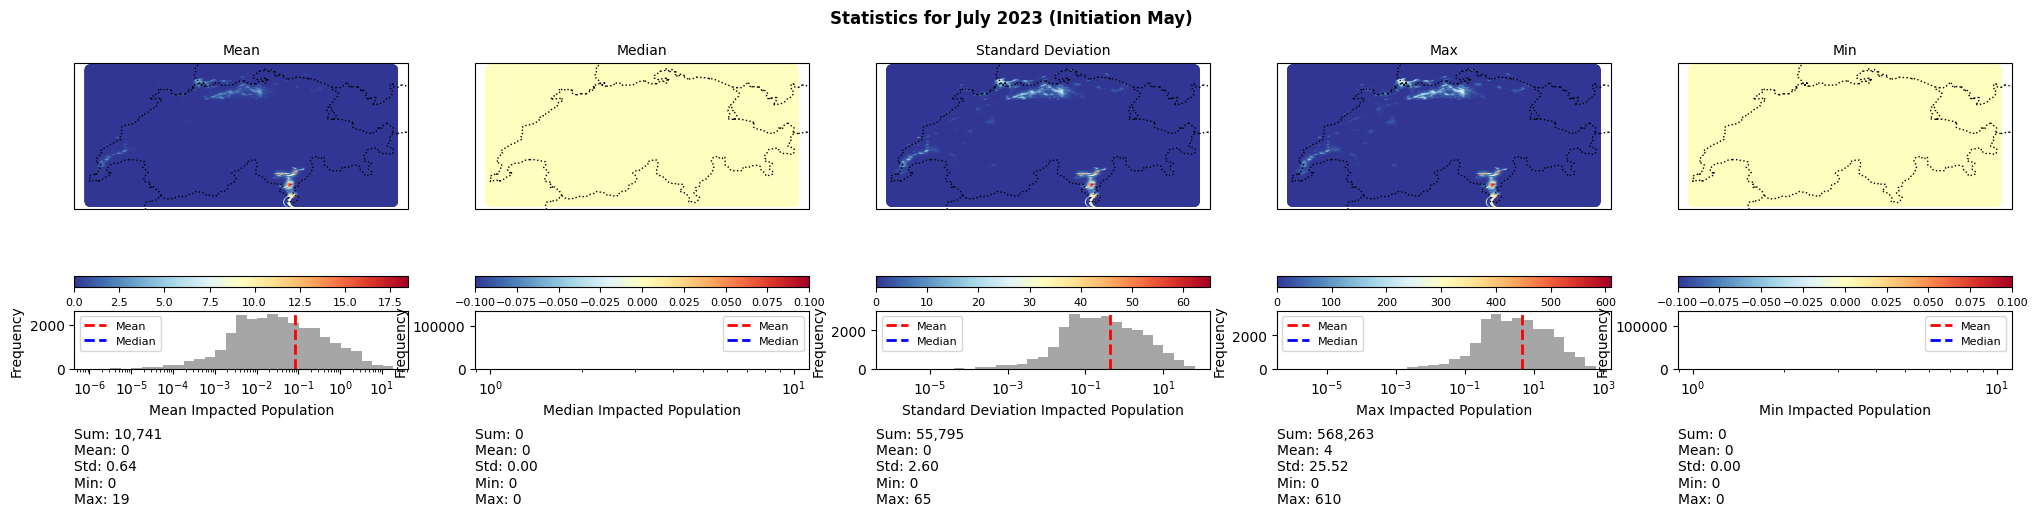

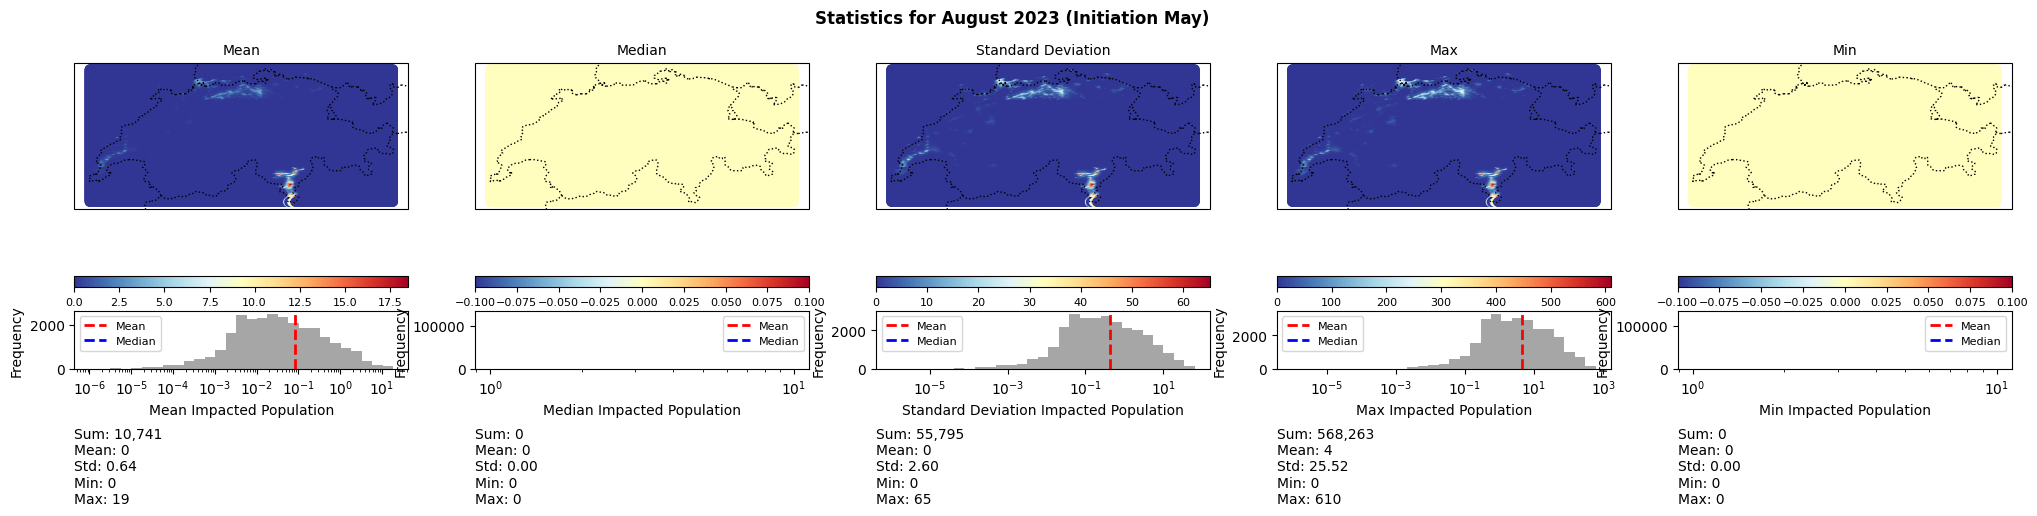

In [32]:
plot_statistics_per_location([2023], "TX30", "03", "04", "05", scale="log")

This section evaluates the spatial distribution of forecasted impacts and the agreement among ensemble members, providing insight into the spatial coherence and reliability of the forecast.

Each row in the figure contains three panels:

1. **Log-Transformed Impact Metric:**
   - Shows either the mean, maximum, or 95th percentile of the exposed population across ensemble members, in log scale.
   - Highlights the intensity and spatial concentration of impacts.

2. **High Agreement Map (>70%):**
   - Highlights regions where at least 70% of ensemble members agree that the local value of the selected metric (e.g. mean or 95th percentile) falls within one standard deviation of the ensemble distribution.
   - These areas indicate high model consensus and more robust forecast signals.

3. **Percentage of Members Agreement:**
   - Displays the full range of agreement, showing the percentage of ensemble members whose forecasted impact values fall near the ensemble mean at each location.
   - Useful for detecting uncertain regions with low consensus.

These diagnostics help assess **where the forecast is spatially consistent**, and guide confidence in forecast-based impact applications.

Looking for impact files in: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/impact/TX30
Loading impact file: /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/impact/TX30/TX30_boundsN5_S44_E11_W48.hdf5


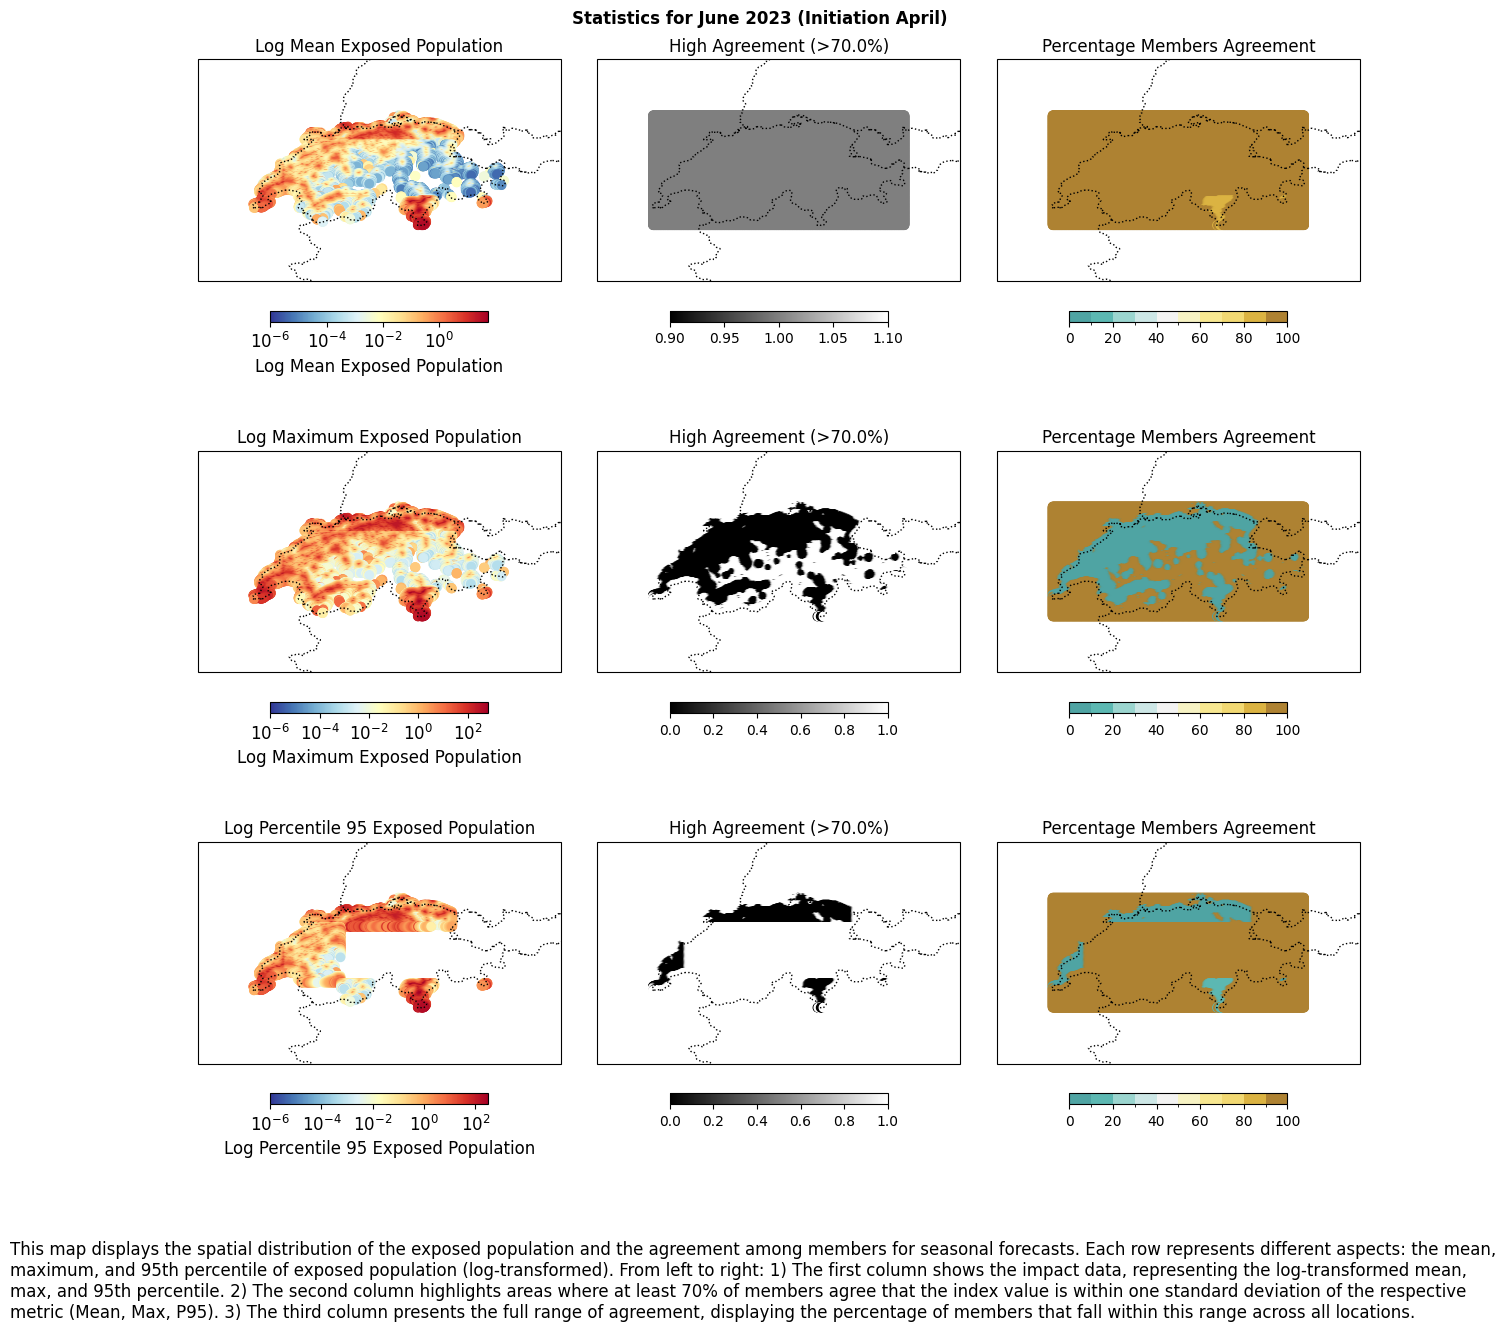

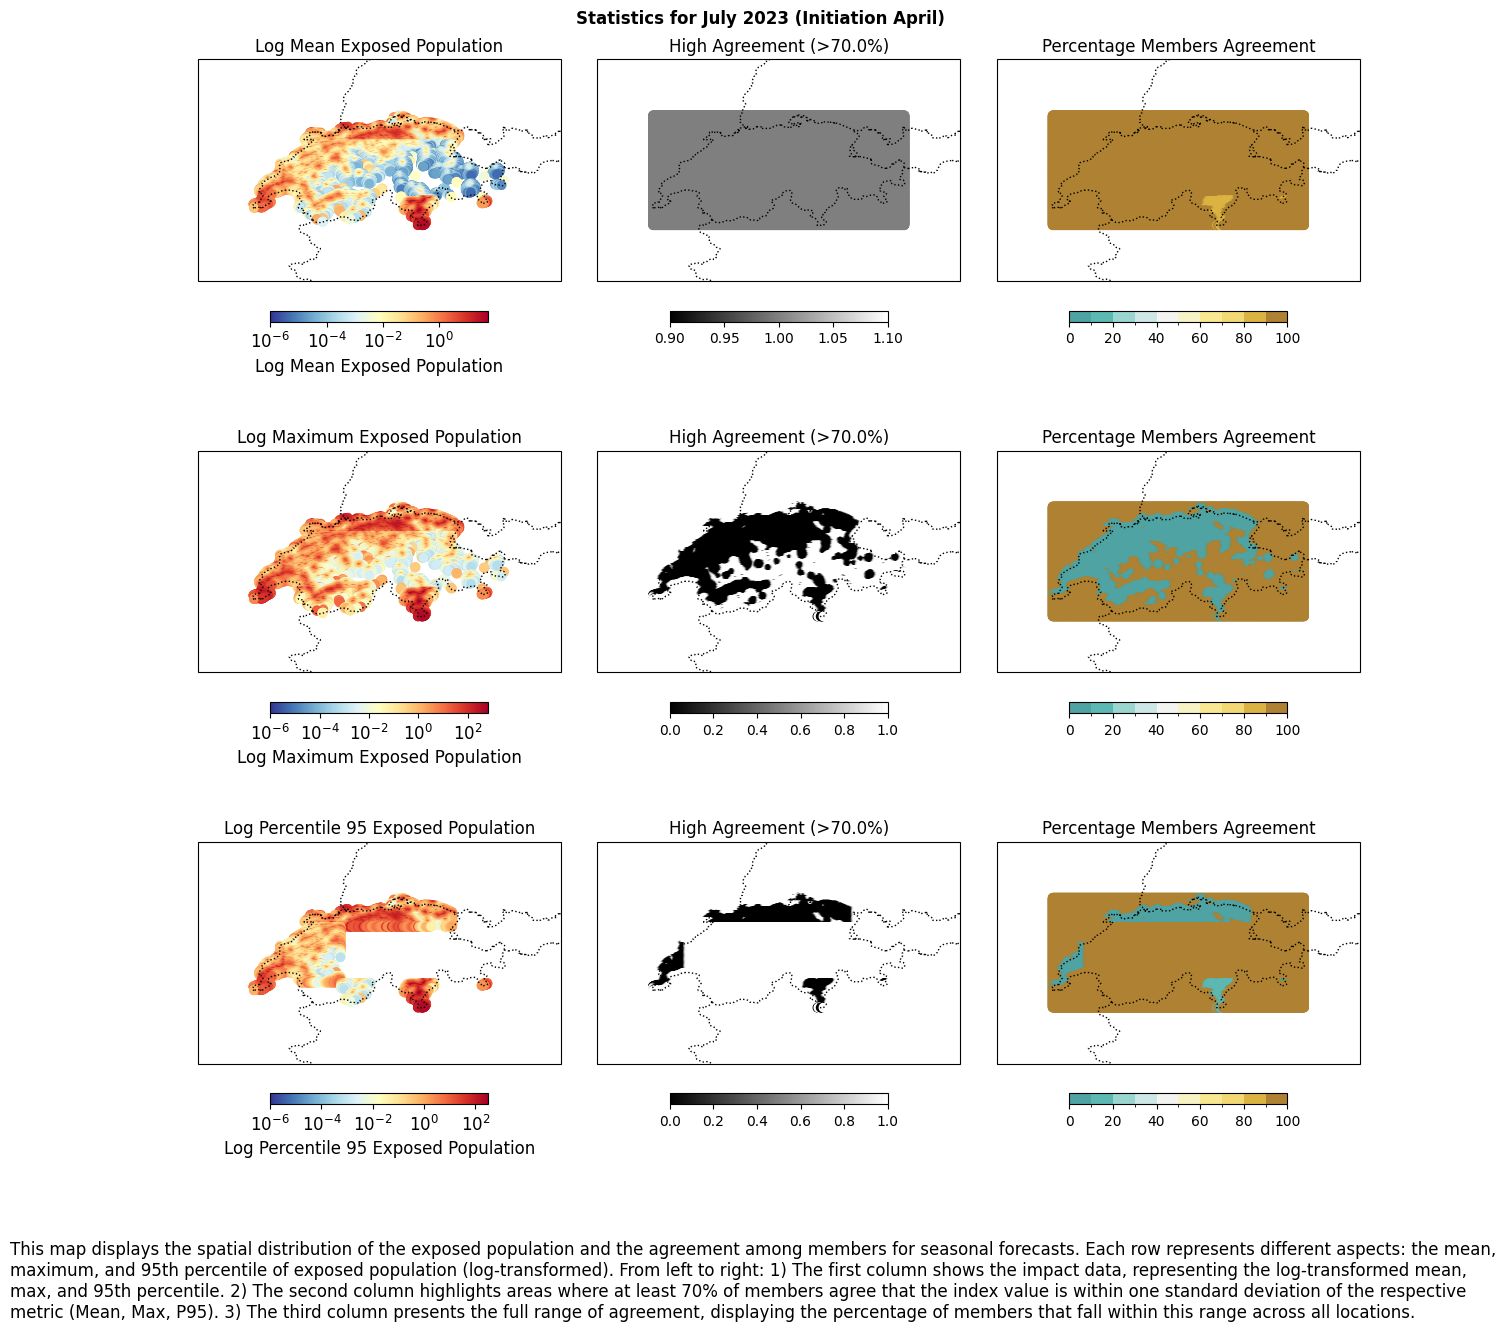

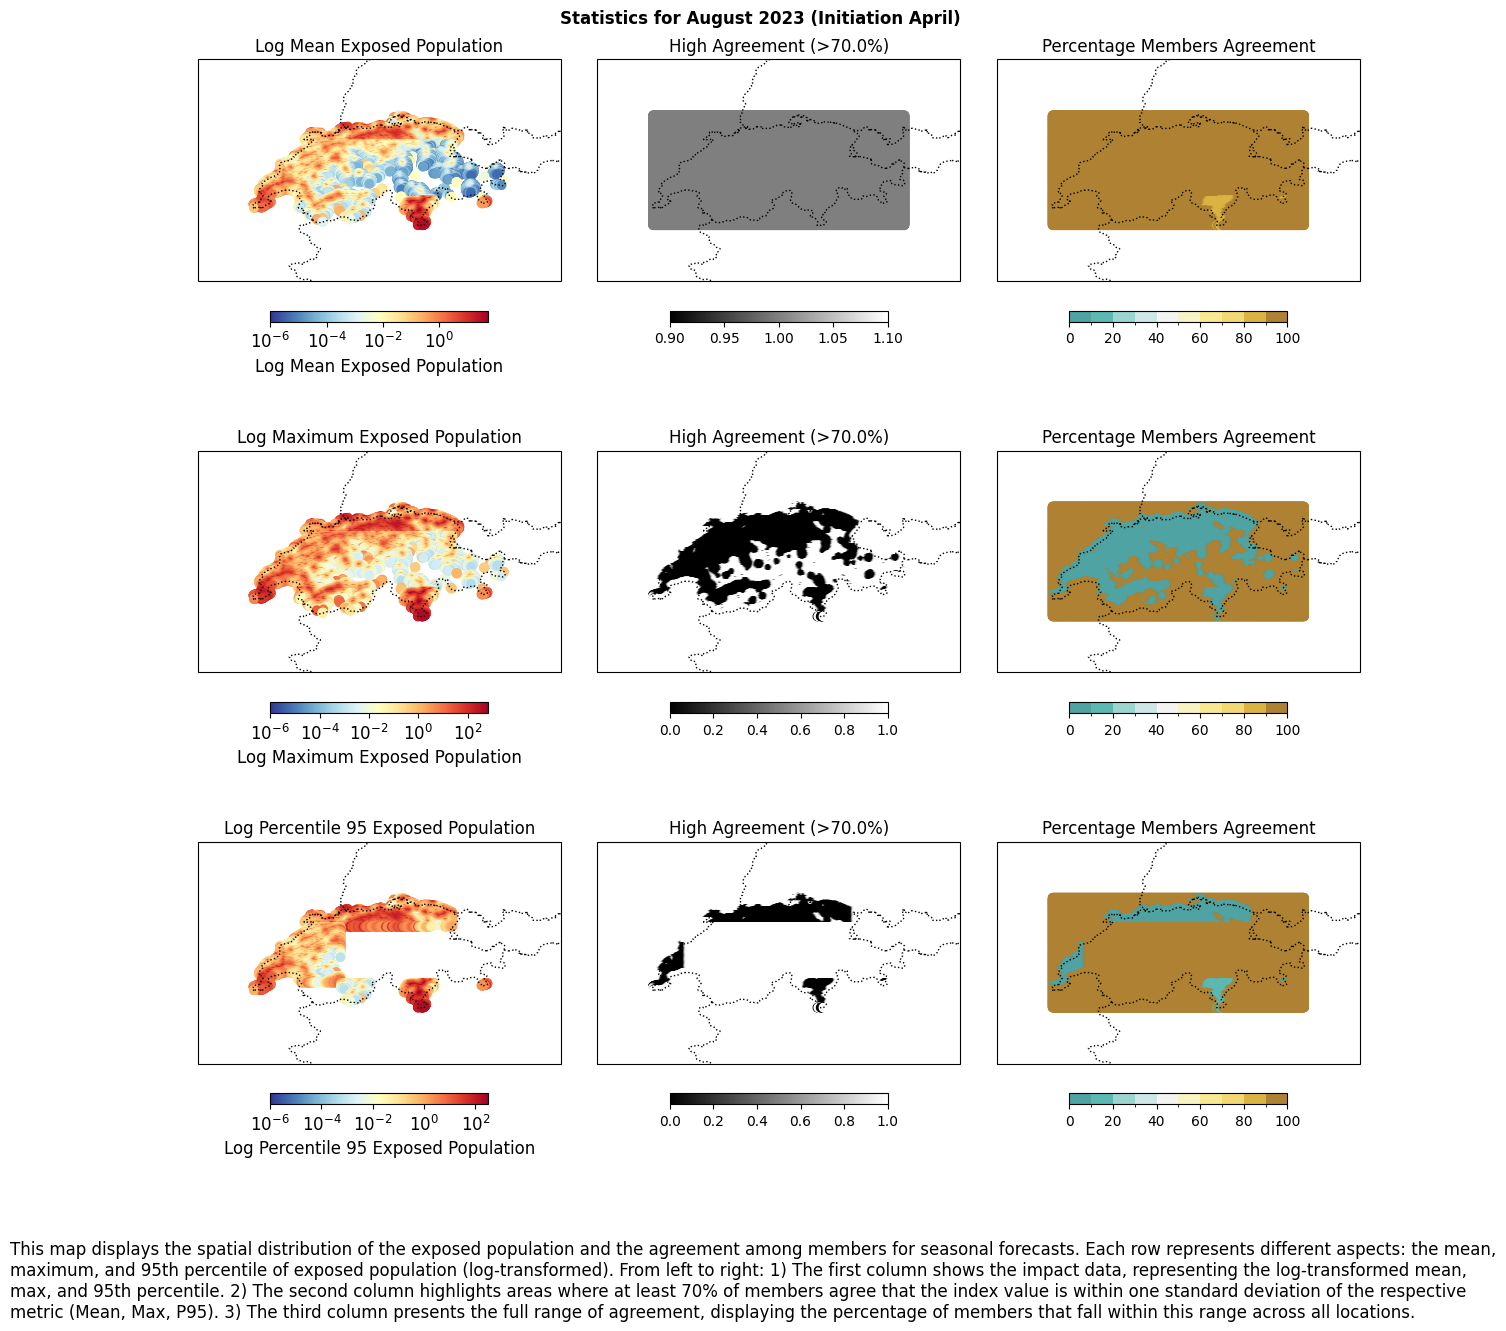

In [33]:
plot_statistics_and_member_agreement([2023], "TX30", 0.7, "04")